In [1]:
import urllib.request
import tarfile
from pathlib import Path
from data import create_dir, download_data
import os
import cv2 
import glob
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image

from torch.utils.data import Dataset, DataLoader
from torchvision import  transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.autograd import Variable
import torchvision.transforms.functional as TF
import torch.optim

from tqdm import tqdm

import random
from random import choice
import shutil
import tarfile

import urllib.request


import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import time

import seaborn as sns

from data_deepglobe import *
from train1 import *
from features import *
from unet import Unet

In [51]:
args = {
    "batch_size": 8,
    "epochs": 50,
    "lr": 0.0001,
    "device": "cpu" ,# set to "cuda" if GPU is available
    "n_components":2
}

In [137]:
base_dir = "/Users/miaoxinran/Downloads/DeepGlobe/land-"

In [138]:
paths = {
    "x": list(glob.glob(base_dir+"train/*sat*")),
    "y": list(glob.glob(base_dir+"train/*.png"))
}

In [140]:
ds = DeepGlobeDataset(x_paths = paths["x"], y_paths = paths["y"])
#loader = DataLoader(ds, batch_size=args["batch_size"], shuffle=True)

Split data into train / validation / test.

In [141]:
validation_split = .15
test_split = .15
validation_size = round(len(ds) * validation_split)
test_size = round(len(ds) * test_split)
train_size = len(ds) - validation_size - test_size

train_ds, validation_ds,test_ds = torch.utils.data.random_split(ds, [train_size, validation_size,test_size])
train_loader = DataLoader(train_ds, batch_size=args["batch_size"], shuffle=True)
validation_loader = DataLoader(validation_ds, batch_size=args["batch_size"], shuffle=True)
test_loader = DataLoader(test_ds, batch_size=args["batch_size"], shuffle=True)
print(len(train_loader.dataset), len(validation_loader.dataset),len(test_loader.dataset))

8994 1927 1927


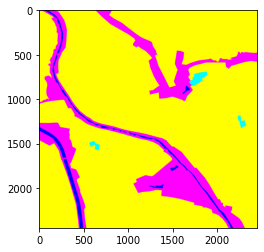

In [142]:
img = cv2.imread('/Users/miaoxinran/Downloads/DeepGlobe/land-train/119_sat.jpg')
mask = cv2.imread('/Users/miaoxinran/Downloads/DeepGlobe/land-train/119_mask.png')
plt.imshow(img)
plt.imshow(mask[:,:,::-1])

In [45]:
# Load the pretrained model
vggmodel = models.vgg16(pretrained=True)
# Use the model object to select the desired layer
#layer = vggmodel._modules.get('avgpool')

In [48]:
start_time = time.time()
for i, d in enumerate(train_loader):
    x = d['image'].to(args["device"])
    feature = extract_features(x,model = vggmodel,flatten = True)
    if i == 0:
        x_features = feature
    else:
        x_features = torch.cat((x_features, feature), 0)
    print('i=',i,'x_features.shape = ',x_features.shape)
    print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 8/8 [00:24<00:00,  3.01s/it]


i= 0 x_features.shape =  torch.Size([8, 25088])
--- 27.232598781585693 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.84s/it]


i= 1 x_features.shape =  torch.Size([16, 25088])
--- 52.890925884246826 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 2 x_features.shape =  torch.Size([24, 25088])
--- 77.17350792884827 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 3 x_features.shape =  torch.Size([32, 25088])
--- 101.21664810180664 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 4 x_features.shape =  torch.Size([40, 25088])
--- 125.09103178977966 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 5 x_features.shape =  torch.Size([48, 25088])
--- 149.22315883636475 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 6 x_features.shape =  torch.Size([56, 25088])
--- 173.1663839817047 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 7 x_features.shape =  torch.Size([64, 25088])
--- 197.49636101722717 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 8 x_features.shape =  torch.Size([72, 25088])
--- 221.54614996910095 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 9 x_features.shape =  torch.Size([80, 25088])
--- 245.4614658355713 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 10 x_features.shape =  torch.Size([88, 25088])
--- 269.76148891448975 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 11 x_features.shape =  torch.Size([96, 25088])
--- 296.04183888435364 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.71s/it]


i= 12 x_features.shape =  torch.Size([104, 25088])
--- 320.54773902893066 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 13 x_features.shape =  torch.Size([112, 25088])
--- 344.37637305259705 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 14 x_features.shape =  torch.Size([120, 25088])
--- 368.2225110530853 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.89s/it]


i= 15 x_features.shape =  torch.Size([128, 25088])
--- 394.12717509269714 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 16 x_features.shape =  torch.Size([136, 25088])
--- 418.562029838562 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 17 x_features.shape =  torch.Size([144, 25088])
--- 444.89014410972595 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 18 x_features.shape =  torch.Size([152, 25088])
--- 468.87259888648987 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 19 x_features.shape =  torch.Size([160, 25088])
--- 492.7618329524994 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 20 x_features.shape =  torch.Size([168, 25088])
--- 517.0349910259247 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 21 x_features.shape =  torch.Size([176, 25088])
--- 541.2666230201721 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 22 x_features.shape =  torch.Size([184, 25088])
--- 565.6507050991058 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 23 x_features.shape =  torch.Size([192, 25088])
--- 590.029375076294 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 24 x_features.shape =  torch.Size([200, 25088])
--- 614.1970589160919 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 25 x_features.shape =  torch.Size([208, 25088])
--- 638.1517357826233 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 26 x_features.shape =  torch.Size([216, 25088])
--- 662.0822529792786 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 27 x_features.shape =  torch.Size([224, 25088])
--- 686.0982558727264 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 28 x_features.shape =  torch.Size([232, 25088])
--- 710.0893359184265 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 29 x_features.shape =  torch.Size([240, 25088])
--- 734.1130788326263 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 30 x_features.shape =  torch.Size([248, 25088])
--- 758.4766519069672 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 31 x_features.shape =  torch.Size([256, 25088])
--- 782.4368011951447 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 32 x_features.shape =  torch.Size([264, 25088])
--- 806.448273897171 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 33 x_features.shape =  torch.Size([272, 25088])
--- 830.2939548492432 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 34 x_features.shape =  torch.Size([280, 25088])
--- 854.1459639072418 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 35 x_features.shape =  torch.Size([288, 25088])
--- 878.0425398349762 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 36 x_features.shape =  torch.Size([296, 25088])
--- 901.9544680118561 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 37 x_features.shape =  torch.Size([304, 25088])
--- 926.0310389995575 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 38 x_features.shape =  torch.Size([312, 25088])
--- 949.937136888504 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 39 x_features.shape =  torch.Size([320, 25088])
--- 973.8427040576935 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 40 x_features.shape =  torch.Size([328, 25088])
--- 997.6382229328156 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 41 x_features.shape =  torch.Size([336, 25088])
--- 1021.5509870052338 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 42 x_features.shape =  torch.Size([344, 25088])
--- 1045.73570394516 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 43 x_features.shape =  torch.Size([352, 25088])
--- 1069.7056448459625 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 44 x_features.shape =  torch.Size([360, 25088])
--- 1093.7954080104828 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 45 x_features.shape =  torch.Size([368, 25088])
--- 1117.6063199043274 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 46 x_features.shape =  torch.Size([376, 25088])
--- 1141.5556800365448 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 47 x_features.shape =  torch.Size([384, 25088])
--- 1165.539477109909 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 48 x_features.shape =  torch.Size([392, 25088])
--- 1189.396784067154 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 49 x_features.shape =  torch.Size([400, 25088])
--- 1213.223968744278 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 50 x_features.shape =  torch.Size([408, 25088])
--- 1237.167242050171 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 51 x_features.shape =  torch.Size([416, 25088])
--- 1261.2990849018097 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 52 x_features.shape =  torch.Size([424, 25088])
--- 1285.4229099750519 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 53 x_features.shape =  torch.Size([432, 25088])
--- 1309.3331520557404 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 54 x_features.shape =  torch.Size([440, 25088])
--- 1333.2031450271606 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 55 x_features.shape =  torch.Size([448, 25088])
--- 1357.1849949359894 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 56 x_features.shape =  torch.Size([456, 25088])
--- 1381.2857151031494 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 57 x_features.shape =  torch.Size([464, 25088])
--- 1405.3616540431976 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 58 x_features.shape =  torch.Size([472, 25088])
--- 1429.3809361457825 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 59 x_features.shape =  torch.Size([480, 25088])
--- 1453.2252860069275 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 60 x_features.shape =  torch.Size([488, 25088])
--- 1477.1675720214844 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 61 x_features.shape =  torch.Size([496, 25088])
--- 1501.0612289905548 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.71s/it]


i= 62 x_features.shape =  torch.Size([504, 25088])
--- 1525.509784936905 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 63 x_features.shape =  torch.Size([512, 25088])
--- 1549.418832063675 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 64 x_features.shape =  torch.Size([520, 25088])
--- 1573.2583470344543 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 65 x_features.shape =  torch.Size([528, 25088])
--- 1597.1103229522705 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 66 x_features.shape =  torch.Size([536, 25088])
--- 1620.9996371269226 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 67 x_features.shape =  torch.Size([544, 25088])
--- 1645.0510759353638 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 68 x_features.shape =  torch.Size([552, 25088])
--- 1668.9554488658905 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 69 x_features.shape =  torch.Size([560, 25088])
--- 1692.948734998703 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 70 x_features.shape =  torch.Size([568, 25088])
--- 1717.0296280384064 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.86s/it]


i= 71 x_features.shape =  torch.Size([576, 25088])
--- 1742.7373321056366 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 72 x_features.shape =  torch.Size([584, 25088])
--- 1767.2107849121094 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 73 x_features.shape =  torch.Size([592, 25088])
--- 1791.6037378311157 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 74 x_features.shape =  torch.Size([600, 25088])
--- 1815.5006051063538 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 75 x_features.shape =  torch.Size([608, 25088])
--- 1839.369090795517 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 76 x_features.shape =  torch.Size([616, 25088])
--- 1863.3712708950043 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 77 x_features.shape =  torch.Size([624, 25088])
--- 1887.4543919563293 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 78 x_features.shape =  torch.Size([632, 25088])
--- 1911.3566589355469 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 79 x_features.shape =  torch.Size([640, 25088])
--- 1935.3273150920868 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 80 x_features.shape =  torch.Size([648, 25088])
--- 1959.3068628311157 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 81 x_features.shape =  torch.Size([656, 25088])
--- 1983.2963190078735 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 82 x_features.shape =  torch.Size([664, 25088])
--- 2007.6535499095917 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 83 x_features.shape =  torch.Size([672, 25088])
--- 2031.5135478973389 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 84 x_features.shape =  torch.Size([680, 25088])
--- 2055.540785074234 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 85 x_features.shape =  torch.Size([688, 25088])
--- 2079.493597984314 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 86 x_features.shape =  torch.Size([696, 25088])
--- 2103.6344170570374 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 87 x_features.shape =  torch.Size([704, 25088])
--- 2128.0278611183167 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 88 x_features.shape =  torch.Size([712, 25088])
--- 2151.949252843857 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 89 x_features.shape =  torch.Size([720, 25088])
--- 2176.0719377994537 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 90 x_features.shape =  torch.Size([728, 25088])
--- 2200.0252339839935 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 91 x_features.shape =  torch.Size([736, 25088])
--- 2224.0096640586853 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 92 x_features.shape =  torch.Size([744, 25088])
--- 2248.094162940979 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 93 x_features.shape =  torch.Size([752, 25088])
--- 2272.0234410762787 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 94 x_features.shape =  torch.Size([760, 25088])
--- 2296.0400128364563 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 95 x_features.shape =  torch.Size([768, 25088])
--- 2320.055244922638 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 96 x_features.shape =  torch.Size([776, 25088])
--- 2343.9829189777374 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 97 x_features.shape =  torch.Size([784, 25088])
--- 2368.1665461063385 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 98 x_features.shape =  torch.Size([792, 25088])
--- 2392.0812220573425 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 99 x_features.shape =  torch.Size([800, 25088])
--- 2416.190551996231 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 100 x_features.shape =  torch.Size([808, 25088])
--- 2440.2478260993958 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 101 x_features.shape =  torch.Size([816, 25088])
--- 2464.265237092972 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 102 x_features.shape =  torch.Size([824, 25088])
--- 2488.399621963501 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 103 x_features.shape =  torch.Size([832, 25088])
--- 2512.290843963623 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 104 x_features.shape =  torch.Size([840, 25088])
--- 2536.4856169223785 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 105 x_features.shape =  torch.Size([848, 25088])
--- 2560.425425052643 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 106 x_features.shape =  torch.Size([856, 25088])
--- 2584.4653458595276 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 107 x_features.shape =  torch.Size([864, 25088])
--- 2608.732867002487 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 108 x_features.shape =  torch.Size([872, 25088])
--- 2632.695281982422 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 109 x_features.shape =  torch.Size([880, 25088])
--- 2656.80313205719 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 110 x_features.shape =  torch.Size([888, 25088])
--- 2680.8055341243744 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.86s/it]


i= 111 x_features.shape =  torch.Size([896, 25088])
--- 2706.425366163254 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 112 x_features.shape =  torch.Size([904, 25088])
--- 2730.6200590133667 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 113 x_features.shape =  torch.Size([912, 25088])
--- 2754.6774051189423 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 114 x_features.shape =  torch.Size([920, 25088])
--- 2778.6736521720886 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 115 x_features.shape =  torch.Size([928, 25088])
--- 2802.6678369045258 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 116 x_features.shape =  torch.Size([936, 25088])
--- 2826.687865972519 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 117 x_features.shape =  torch.Size([944, 25088])
--- 2850.7835500240326 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 118 x_features.shape =  torch.Size([952, 25088])
--- 2874.574358224869 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 119 x_features.shape =  torch.Size([960, 25088])
--- 2898.8141129016876 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 120 x_features.shape =  torch.Size([968, 25088])
--- 2922.71013212204 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 121 x_features.shape =  torch.Size([976, 25088])
--- 2946.5854239463806 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 122 x_features.shape =  torch.Size([984, 25088])
--- 2970.5258440971375 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 123 x_features.shape =  torch.Size([992, 25088])
--- 2994.298726081848 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 124 x_features.shape =  torch.Size([1000, 25088])
--- 3018.0858430862427 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 125 x_features.shape =  torch.Size([1008, 25088])
--- 3042.0779790878296 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 126 x_features.shape =  torch.Size([1016, 25088])
--- 3065.8249921798706 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 127 x_features.shape =  torch.Size([1024, 25088])
--- 3089.7794830799103 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 128 x_features.shape =  torch.Size([1032, 25088])
--- 3113.530566930771 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 129 x_features.shape =  torch.Size([1040, 25088])
--- 3137.2877299785614 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 130 x_features.shape =  torch.Size([1048, 25088])
--- 3161.1804950237274 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 131 x_features.shape =  torch.Size([1056, 25088])
--- 3184.9646620750427 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 132 x_features.shape =  torch.Size([1064, 25088])
--- 3208.8215670585632 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 133 x_features.shape =  torch.Size([1072, 25088])
--- 3232.718561887741 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 134 x_features.shape =  torch.Size([1080, 25088])
--- 3256.5160138607025 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 135 x_features.shape =  torch.Size([1088, 25088])
--- 3280.2867579460144 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 136 x_features.shape =  torch.Size([1096, 25088])
--- 3304.0551109313965 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 137 x_features.shape =  torch.Size([1104, 25088])
--- 3328.010204076767 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 138 x_features.shape =  torch.Size([1112, 25088])
--- 3351.8352711200714 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 139 x_features.shape =  torch.Size([1120, 25088])
--- 3375.633635997772 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 140 x_features.shape =  torch.Size([1128, 25088])
--- 3399.438649892807 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 141 x_features.shape =  torch.Size([1136, 25088])
--- 3423.2184879779816 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 142 x_features.shape =  torch.Size([1144, 25088])
--- 3447.1608641147614 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 143 x_features.shape =  torch.Size([1152, 25088])
--- 3470.9839749336243 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 144 x_features.shape =  torch.Size([1160, 25088])
--- 3494.820900917053 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 145 x_features.shape =  torch.Size([1168, 25088])
--- 3518.657716035843 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 146 x_features.shape =  torch.Size([1176, 25088])
--- 3542.5168731212616 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 147 x_features.shape =  torch.Size([1184, 25088])
--- 3566.5050477981567 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 148 x_features.shape =  torch.Size([1192, 25088])
--- 3590.2675359249115 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 149 x_features.shape =  torch.Size([1200, 25088])
--- 3614.0651359558105 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 150 x_features.shape =  torch.Size([1208, 25088])
--- 3637.8591001033783 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 151 x_features.shape =  torch.Size([1216, 25088])
--- 3661.6455597877502 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 152 x_features.shape =  torch.Size([1224, 25088])
--- 3685.657065153122 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 153 x_features.shape =  torch.Size([1232, 25088])
--- 3709.401472091675 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 154 x_features.shape =  torch.Size([1240, 25088])
--- 3733.2089591026306 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.84s/it]


i= 155 x_features.shape =  torch.Size([1248, 25088])
--- 3758.829643011093 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 156 x_features.shape =  torch.Size([1256, 25088])
--- 3782.753103017807 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 157 x_features.shape =  torch.Size([1264, 25088])
--- 3807.120301961899 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 158 x_features.shape =  torch.Size([1272, 25088])
--- 3830.8694081306458 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 159 x_features.shape =  torch.Size([1280, 25088])
--- 3854.5751378536224 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 160 x_features.shape =  torch.Size([1288, 25088])
--- 3878.521376132965 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 161 x_features.shape =  torch.Size([1296, 25088])
--- 3902.124631881714 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 162 x_features.shape =  torch.Size([1304, 25088])
--- 3925.8356709480286 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 163 x_features.shape =  torch.Size([1312, 25088])
--- 3949.560863018036 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 164 x_features.shape =  torch.Size([1320, 25088])
--- 3973.315915107727 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 165 x_features.shape =  torch.Size([1328, 25088])
--- 3996.948446035385 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 166 x_features.shape =  torch.Size([1336, 25088])
--- 4020.596150159836 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 167 x_features.shape =  torch.Size([1344, 25088])
--- 4044.3736379146576 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 168 x_features.shape =  torch.Size([1352, 25088])
--- 4068.1492099761963 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 169 x_features.shape =  torch.Size([1360, 25088])
--- 4091.7461688518524 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 170 x_features.shape =  torch.Size([1368, 25088])
--- 4115.374016046524 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 171 x_features.shape =  torch.Size([1376, 25088])
--- 4139.2118418216705 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 172 x_features.shape =  torch.Size([1384, 25088])
--- 4162.961478948593 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 173 x_features.shape =  torch.Size([1392, 25088])
--- 4186.613320112228 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 174 x_features.shape =  torch.Size([1400, 25088])
--- 4210.319195985794 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 175 x_features.shape =  torch.Size([1408, 25088])
--- 4234.013575077057 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 176 x_features.shape =  torch.Size([1416, 25088])
--- 4257.675596952438 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 177 x_features.shape =  torch.Size([1424, 25088])
--- 4281.516716957092 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 178 x_features.shape =  torch.Size([1432, 25088])
--- 4305.148501157761 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 179 x_features.shape =  torch.Size([1440, 25088])
--- 4328.84254693985 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 180 x_features.shape =  torch.Size([1448, 25088])
--- 4352.566679954529 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 181 x_features.shape =  torch.Size([1456, 25088])
--- 4376.268896818161 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 182 x_features.shape =  torch.Size([1464, 25088])
--- 4400.056401014328 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 183 x_features.shape =  torch.Size([1472, 25088])
--- 4423.854186058044 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 184 x_features.shape =  torch.Size([1480, 25088])
--- 4447.534335136414 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.78s/it]


i= 185 x_features.shape =  torch.Size([1488, 25088])
--- 4472.561703920364 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 186 x_features.shape =  torch.Size([1496, 25088])
--- 4496.452602863312 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 187 x_features.shape =  torch.Size([1504, 25088])
--- 4520.495975971222 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 188 x_features.shape =  torch.Size([1512, 25088])
--- 4544.608006000519 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 189 x_features.shape =  torch.Size([1520, 25088])
--- 4568.455940008163 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 190 x_features.shape =  torch.Size([1528, 25088])
--- 4592.404090881348 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 191 x_features.shape =  torch.Size([1536, 25088])
--- 4616.282431125641 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 192 x_features.shape =  torch.Size([1544, 25088])
--- 4640.219704866409 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 193 x_features.shape =  torch.Size([1552, 25088])
--- 4664.1699368953705 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 194 x_features.shape =  torch.Size([1560, 25088])
--- 4688.123069047928 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 195 x_features.shape =  torch.Size([1568, 25088])
--- 4712.09464097023 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 196 x_features.shape =  torch.Size([1576, 25088])
--- 4735.960926055908 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 197 x_features.shape =  torch.Size([1584, 25088])
--- 4759.896928071976 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 198 x_features.shape =  torch.Size([1592, 25088])
--- 4783.975711107254 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 199 x_features.shape =  torch.Size([1600, 25088])
--- 4807.801805973053 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 200 x_features.shape =  torch.Size([1608, 25088])
--- 4831.733722925186 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 201 x_features.shape =  torch.Size([1616, 25088])
--- 4855.513930082321 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 202 x_features.shape =  torch.Size([1624, 25088])
--- 4879.328707933426 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 203 x_features.shape =  torch.Size([1632, 25088])
--- 4903.399514913559 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 204 x_features.shape =  torch.Size([1640, 25088])
--- 4927.315752983093 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 205 x_features.shape =  torch.Size([1648, 25088])
--- 4951.247906923294 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 206 x_features.shape =  torch.Size([1656, 25088])
--- 4975.131764173508 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 207 x_features.shape =  torch.Size([1664, 25088])
--- 4999.031931877136 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 208 x_features.shape =  torch.Size([1672, 25088])
--- 5023.122356176376 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 209 x_features.shape =  torch.Size([1680, 25088])
--- 5047.0765788555145 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 210 x_features.shape =  torch.Size([1688, 25088])
--- 5071.146100997925 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 211 x_features.shape =  torch.Size([1696, 25088])
--- 5095.2393980026245 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 212 x_features.shape =  torch.Size([1704, 25088])
--- 5119.074595928192 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 213 x_features.shape =  torch.Size([1712, 25088])
--- 5143.122838973999 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 214 x_features.shape =  torch.Size([1720, 25088])
--- 5166.998172044754 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 215 x_features.shape =  torch.Size([1728, 25088])
--- 5190.988713026047 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 216 x_features.shape =  torch.Size([1736, 25088])
--- 5214.813859939575 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 217 x_features.shape =  torch.Size([1744, 25088])
--- 5238.77411699295 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 218 x_features.shape =  torch.Size([1752, 25088])
--- 5262.871327161789 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 219 x_features.shape =  torch.Size([1760, 25088])
--- 5286.716248989105 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 220 x_features.shape =  torch.Size([1768, 25088])
--- 5310.662868976593 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 221 x_features.shape =  torch.Size([1776, 25088])
--- 5334.558245897293 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 222 x_features.shape =  torch.Size([1784, 25088])
--- 5358.5539400577545 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 223 x_features.shape =  torch.Size([1792, 25088])
--- 5382.724101066589 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 224 x_features.shape =  torch.Size([1800, 25088])
--- 5406.6648478508 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 225 x_features.shape =  torch.Size([1808, 25088])
--- 5430.619491815567 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 226 x_features.shape =  torch.Size([1816, 25088])
--- 5454.570291996002 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 227 x_features.shape =  torch.Size([1824, 25088])
--- 5478.422861814499 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 228 x_features.shape =  torch.Size([1832, 25088])
--- 5502.513648986816 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 229 x_features.shape =  torch.Size([1840, 25088])
--- 5526.432341098785 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 230 x_features.shape =  torch.Size([1848, 25088])
--- 5550.461315870285 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 231 x_features.shape =  torch.Size([1856, 25088])
--- 5574.473378896713 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 232 x_features.shape =  torch.Size([1864, 25088])
--- 5598.387321949005 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 233 x_features.shape =  torch.Size([1872, 25088])
--- 5622.448302030563 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 234 x_features.shape =  torch.Size([1880, 25088])
--- 5646.335047960281 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 235 x_features.shape =  torch.Size([1888, 25088])
--- 5670.217041969299 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 236 x_features.shape =  torch.Size([1896, 25088])
--- 5694.154942035675 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 237 x_features.shape =  torch.Size([1904, 25088])
--- 5718.083537101746 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 238 x_features.shape =  torch.Size([1912, 25088])
--- 5742.220139980316 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 239 x_features.shape =  torch.Size([1920, 25088])
--- 5766.169113874435 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 240 x_features.shape =  torch.Size([1928, 25088])
--- 5790.160974025726 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 241 x_features.shape =  torch.Size([1936, 25088])
--- 5814.124747753143 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 242 x_features.shape =  torch.Size([1944, 25088])
--- 5838.015839099884 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 243 x_features.shape =  torch.Size([1952, 25088])
--- 5862.082545042038 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 244 x_features.shape =  torch.Size([1960, 25088])
--- 5885.926467895508 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 245 x_features.shape =  torch.Size([1968, 25088])
--- 5909.912513017654 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 246 x_features.shape =  torch.Size([1976, 25088])
--- 5933.9845860004425 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 247 x_features.shape =  torch.Size([1984, 25088])
--- 5958.120476961136 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 248 x_features.shape =  torch.Size([1992, 25088])
--- 5982.408280849457 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 249 x_features.shape =  torch.Size([2000, 25088])
--- 6006.3183472156525 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 250 x_features.shape =  torch.Size([2008, 25088])
--- 6030.347080945969 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 251 x_features.shape =  torch.Size([2016, 25088])
--- 6054.435685873032 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 252 x_features.shape =  torch.Size([2024, 25088])
--- 6078.520789146423 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 253 x_features.shape =  torch.Size([2032, 25088])
--- 6102.635549068451 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 254 x_features.shape =  torch.Size([2040, 25088])
--- 6126.612123966217 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 255 x_features.shape =  torch.Size([2048, 25088])
--- 6150.743254184723 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 256 x_features.shape =  torch.Size([2056, 25088])
--- 6174.801494836807 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 257 x_features.shape =  torch.Size([2064, 25088])
--- 6198.801775932312 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 258 x_features.shape =  torch.Size([2072, 25088])
--- 6222.943926811218 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 259 x_features.shape =  torch.Size([2080, 25088])
--- 6246.795403957367 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 260 x_features.shape =  torch.Size([2088, 25088])
--- 6270.96036696434 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 261 x_features.shape =  torch.Size([2096, 25088])
--- 6295.144721984863 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 262 x_features.shape =  torch.Size([2104, 25088])
--- 6319.252086162567 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 263 x_features.shape =  torch.Size([2112, 25088])
--- 6343.737760782242 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 264 x_features.shape =  torch.Size([2120, 25088])
--- 6367.891499042511 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.71s/it]


i= 265 x_features.shape =  torch.Size([2128, 25088])
--- 6392.3949818611145 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 266 x_features.shape =  torch.Size([2136, 25088])
--- 6416.685899972916 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 267 x_features.shape =  torch.Size([2144, 25088])
--- 6440.611747980118 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 268 x_features.shape =  torch.Size([2152, 25088])
--- 6464.64972615242 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 269 x_features.shape =  torch.Size([2160, 25088])
--- 6488.580534934998 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 270 x_features.shape =  torch.Size([2168, 25088])
--- 6512.684891939163 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 271 x_features.shape =  torch.Size([2176, 25088])
--- 6536.825742006302 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 272 x_features.shape =  torch.Size([2184, 25088])
--- 6561.0641078948975 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 273 x_features.shape =  torch.Size([2192, 25088])
--- 6585.252124071121 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 274 x_features.shape =  torch.Size([2200, 25088])
--- 6609.442932128906 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 275 x_features.shape =  torch.Size([2208, 25088])
--- 6633.424828052521 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 276 x_features.shape =  torch.Size([2216, 25088])
--- 6657.3357009887695 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 277 x_features.shape =  torch.Size([2224, 25088])
--- 6681.3609738349915 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 278 x_features.shape =  torch.Size([2232, 25088])
--- 6705.270411968231 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 279 x_features.shape =  torch.Size([2240, 25088])
--- 6729.181802988052 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 280 x_features.shape =  torch.Size([2248, 25088])
--- 6753.134022951126 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 281 x_features.shape =  torch.Size([2256, 25088])
--- 6777.0534291267395 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 282 x_features.shape =  torch.Size([2264, 25088])
--- 6801.08628487587 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 283 x_features.shape =  torch.Size([2272, 25088])
--- 6825.015179872513 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 284 x_features.shape =  torch.Size([2280, 25088])
--- 6848.846034049988 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 285 x_features.shape =  torch.Size([2288, 25088])
--- 6873.045455932617 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 286 x_features.shape =  torch.Size([2296, 25088])
--- 6896.9312789440155 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 287 x_features.shape =  torch.Size([2304, 25088])
--- 6920.999222993851 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 288 x_features.shape =  torch.Size([2312, 25088])
--- 6945.0260598659515 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 289 x_features.shape =  torch.Size([2320, 25088])
--- 6968.923676967621 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 290 x_features.shape =  torch.Size([2328, 25088])
--- 6993.012139797211 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 291 x_features.shape =  torch.Size([2336, 25088])
--- 7016.9029750823975 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 292 x_features.shape =  torch.Size([2344, 25088])
--- 7041.041969060898 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 293 x_features.shape =  torch.Size([2352, 25088])
--- 7065.075688123703 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 294 x_features.shape =  torch.Size([2360, 25088])
--- 7089.061398983002 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 295 x_features.shape =  torch.Size([2368, 25088])
--- 7113.010591983795 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 296 x_features.shape =  torch.Size([2376, 25088])
--- 7136.900547981262 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 297 x_features.shape =  torch.Size([2384, 25088])
--- 7160.858550071716 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 298 x_features.shape =  torch.Size([2392, 25088])
--- 7185.017067909241 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 299 x_features.shape =  torch.Size([2400, 25088])
--- 7208.926265001297 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 300 x_features.shape =  torch.Size([2408, 25088])
--- 7232.8398180007935 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 301 x_features.shape =  torch.Size([2416, 25088])
--- 7256.880204916 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 302 x_features.shape =  torch.Size([2424, 25088])
--- 7280.990258932114 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 303 x_features.shape =  torch.Size([2432, 25088])
--- 7304.942291021347 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 304 x_features.shape =  torch.Size([2440, 25088])
--- 7328.882582902908 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 305 x_features.shape =  torch.Size([2448, 25088])
--- 7352.990971088409 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 306 x_features.shape =  torch.Size([2456, 25088])
--- 7376.841463804245 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 307 x_features.shape =  torch.Size([2464, 25088])
--- 7400.896203756332 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 308 x_features.shape =  torch.Size([2472, 25088])
--- 7424.954646110535 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 309 x_features.shape =  torch.Size([2480, 25088])
--- 7448.8732850551605 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 310 x_features.shape =  torch.Size([2488, 25088])
--- 7473.163311958313 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 311 x_features.shape =  torch.Size([2496, 25088])
--- 7497.109902858734 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 312 x_features.shape =  torch.Size([2504, 25088])
--- 7521.161581993103 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 313 x_features.shape =  torch.Size([2512, 25088])
--- 7545.049025058746 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 314 x_features.shape =  torch.Size([2520, 25088])
--- 7568.964836835861 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 315 x_features.shape =  torch.Size([2528, 25088])
--- 7592.899011850357 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 316 x_features.shape =  torch.Size([2536, 25088])
--- 7616.763833999634 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 317 x_features.shape =  torch.Size([2544, 25088])
--- 7640.697104930878 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 318 x_features.shape =  torch.Size([2552, 25088])
--- 7664.731320858002 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 319 x_features.shape =  torch.Size([2560, 25088])
--- 7688.639531135559 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 320 x_features.shape =  torch.Size([2568, 25088])
--- 7712.6487720012665 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 321 x_features.shape =  torch.Size([2576, 25088])
--- 7736.599906921387 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 322 x_features.shape =  torch.Size([2584, 25088])
--- 7760.574890136719 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 323 x_features.shape =  torch.Size([2592, 25088])
--- 7784.667917966843 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 324 x_features.shape =  torch.Size([2600, 25088])
--- 7808.644096136093 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 325 x_features.shape =  torch.Size([2608, 25088])
--- 7832.554113149643 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 326 x_features.shape =  torch.Size([2616, 25088])
--- 7856.556214094162 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 327 x_features.shape =  torch.Size([2624, 25088])
--- 7880.440614938736 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 328 x_features.shape =  torch.Size([2632, 25088])
--- 7904.6737408638 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 329 x_features.shape =  torch.Size([2640, 25088])
--- 7928.614336013794 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 330 x_features.shape =  torch.Size([2648, 25088])
--- 7952.5968978405 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 331 x_features.shape =  torch.Size([2656, 25088])
--- 7976.443336009979 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 332 x_features.shape =  torch.Size([2664, 25088])
--- 8000.569875001907 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 333 x_features.shape =  torch.Size([2672, 25088])
--- 8024.620577812195 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 334 x_features.shape =  torch.Size([2680, 25088])
--- 8048.590579986572 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 335 x_features.shape =  torch.Size([2688, 25088])
--- 8072.978904008865 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 336 x_features.shape =  torch.Size([2696, 25088])
--- 8097.221071958542 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.79s/it]


i= 337 x_features.shape =  torch.Size([2704, 25088])
--- 8122.452378034592 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 338 x_features.shape =  torch.Size([2712, 25088])
--- 8146.738561868668 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 339 x_features.shape =  torch.Size([2720, 25088])
--- 8170.683104753494 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 340 x_features.shape =  torch.Size([2728, 25088])
--- 8194.58676314354 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 341 x_features.shape =  torch.Size([2736, 25088])
--- 8218.54664683342 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 342 x_features.shape =  torch.Size([2744, 25088])
--- 8242.587016105652 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 343 x_features.shape =  torch.Size([2752, 25088])
--- 8266.48419380188 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 344 x_features.shape =  torch.Size([2760, 25088])
--- 8290.450904846191 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 345 x_features.shape =  torch.Size([2768, 25088])
--- 8316.759011983871 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.85s/it]


i= 346 x_features.shape =  torch.Size([2776, 25088])
--- 8342.590050935745 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.87s/it]


i= 347 x_features.shape =  torch.Size([2784, 25088])
--- 8368.602053880692 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 348 x_features.shape =  torch.Size([2792, 25088])
--- 8393.306701898575 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 349 x_features.shape =  torch.Size([2800, 25088])
--- 8417.15469288826 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 350 x_features.shape =  torch.Size([2808, 25088])
--- 8441.061654090881 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 351 x_features.shape =  torch.Size([2816, 25088])
--- 8464.841423034668 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 352 x_features.shape =  torch.Size([2824, 25088])
--- 8488.805718183517 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 353 x_features.shape =  torch.Size([2832, 25088])
--- 8512.653460025787 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 354 x_features.shape =  torch.Size([2840, 25088])
--- 8536.551219940186 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 355 x_features.shape =  torch.Size([2848, 25088])
--- 8560.40705704689 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 356 x_features.shape =  torch.Size([2856, 25088])
--- 8584.291547060013 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 357 x_features.shape =  torch.Size([2864, 25088])
--- 8608.245174884796 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 358 x_features.shape =  torch.Size([2872, 25088])
--- 8632.133323907852 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 359 x_features.shape =  torch.Size([2880, 25088])
--- 8656.010771036148 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 360 x_features.shape =  torch.Size([2888, 25088])
--- 8679.933833122253 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 361 x_features.shape =  torch.Size([2896, 25088])
--- 8703.781399965286 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 362 x_features.shape =  torch.Size([2904, 25088])
--- 8727.827513933182 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 363 x_features.shape =  torch.Size([2912, 25088])
--- 8751.813113927841 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 364 x_features.shape =  torch.Size([2920, 25088])
--- 8775.67079782486 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 365 x_features.shape =  torch.Size([2928, 25088])
--- 8799.635612010956 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 366 x_features.shape =  torch.Size([2936, 25088])
--- 8823.483680009842 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 367 x_features.shape =  torch.Size([2944, 25088])
--- 8847.455969810486 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 368 x_features.shape =  torch.Size([2952, 25088])
--- 8871.356806993484 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 369 x_features.shape =  torch.Size([2960, 25088])
--- 8895.23030090332 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 370 x_features.shape =  torch.Size([2968, 25088])
--- 8919.186252832413 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 371 x_features.shape =  torch.Size([2976, 25088])
--- 8942.972739934921 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 372 x_features.shape =  torch.Size([2984, 25088])
--- 8967.030843019485 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 373 x_features.shape =  torch.Size([2992, 25088])
--- 8990.923522949219 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 374 x_features.shape =  torch.Size([3000, 25088])
--- 9014.876215934753 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 375 x_features.shape =  torch.Size([3008, 25088])
--- 9038.743062973022 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 376 x_features.shape =  torch.Size([3016, 25088])
--- 9062.704267978668 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 377 x_features.shape =  torch.Size([3024, 25088])
--- 9086.811651945114 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 378 x_features.shape =  torch.Size([3032, 25088])
--- 9110.687051057816 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 379 x_features.shape =  torch.Size([3040, 25088])
--- 9134.568682193756 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 380 x_features.shape =  torch.Size([3048, 25088])
--- 9158.488790988922 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 381 x_features.shape =  torch.Size([3056, 25088])
--- 9182.2956199646 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 382 x_features.shape =  torch.Size([3064, 25088])
--- 9206.318928956985 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 383 x_features.shape =  torch.Size([3072, 25088])
--- 9230.257665157318 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 384 x_features.shape =  torch.Size([3080, 25088])
--- 9254.231806993484 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 385 x_features.shape =  torch.Size([3088, 25088])
--- 9278.493499994278 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 386 x_features.shape =  torch.Size([3096, 25088])
--- 9302.398478031158 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 387 x_features.shape =  torch.Size([3104, 25088])
--- 9326.49227309227 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 388 x_features.shape =  torch.Size([3112, 25088])
--- 9350.448279857635 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 389 x_features.shape =  torch.Size([3120, 25088])
--- 9374.362070798874 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 390 x_features.shape =  torch.Size([3128, 25088])
--- 9398.164683103561 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 391 x_features.shape =  torch.Size([3136, 25088])
--- 9421.912945985794 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 392 x_features.shape =  torch.Size([3144, 25088])
--- 9445.997854948044 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 393 x_features.shape =  torch.Size([3152, 25088])
--- 9469.828502893448 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 394 x_features.shape =  torch.Size([3160, 25088])
--- 9493.66657114029 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 395 x_features.shape =  torch.Size([3168, 25088])
--- 9517.543960809708 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 396 x_features.shape =  torch.Size([3176, 25088])
--- 9541.394821882248 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 397 x_features.shape =  torch.Size([3184, 25088])
--- 9565.31207895279 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 398 x_features.shape =  torch.Size([3192, 25088])
--- 9589.174559116364 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 399 x_features.shape =  torch.Size([3200, 25088])
--- 9613.040755987167 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 400 x_features.shape =  torch.Size([3208, 25088])
--- 9636.86787700653 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 401 x_features.shape =  torch.Size([3216, 25088])
--- 9660.82623910904 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 402 x_features.shape =  torch.Size([3224, 25088])
--- 9684.851862192154 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 403 x_features.shape =  torch.Size([3232, 25088])
--- 9708.708847045898 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 404 x_features.shape =  torch.Size([3240, 25088])
--- 9732.799998044968 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 405 x_features.shape =  torch.Size([3248, 25088])
--- 9756.702605962753 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 406 x_features.shape =  torch.Size([3256, 25088])
--- 9780.595258951187 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 407 x_features.shape =  torch.Size([3264, 25088])
--- 9804.661333084106 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 408 x_features.shape =  torch.Size([3272, 25088])
--- 9828.511410951614 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 409 x_features.shape =  torch.Size([3280, 25088])
--- 9852.380603075027 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 410 x_features.shape =  torch.Size([3288, 25088])
--- 9876.348020076752 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 411 x_features.shape =  torch.Size([3296, 25088])
--- 9900.230767011642 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 412 x_features.shape =  torch.Size([3304, 25088])
--- 9924.227751970291 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 413 x_features.shape =  torch.Size([3312, 25088])
--- 9948.398766994476 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 414 x_features.shape =  torch.Size([3320, 25088])
--- 9972.357267141342 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 415 x_features.shape =  torch.Size([3328, 25088])
--- 9996.644184827805 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 416 x_features.shape =  torch.Size([3336, 25088])
--- 10020.551307201385 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 417 x_features.shape =  torch.Size([3344, 25088])
--- 10044.591475963593 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 418 x_features.shape =  torch.Size([3352, 25088])
--- 10068.400667905807 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 419 x_features.shape =  torch.Size([3360, 25088])
--- 10092.210721969604 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 420 x_features.shape =  torch.Size([3368, 25088])
--- 10116.084729909897 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 421 x_features.shape =  torch.Size([3376, 25088])
--- 10139.970380783081 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 422 x_features.shape =  torch.Size([3384, 25088])
--- 10164.016805887222 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 423 x_features.shape =  torch.Size([3392, 25088])
--- 10187.906065940857 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 424 x_features.shape =  torch.Size([3400, 25088])
--- 10211.827243089676 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 425 x_features.shape =  torch.Size([3408, 25088])
--- 10235.761734962463 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 426 x_features.shape =  torch.Size([3416, 25088])
--- 10259.591835021973 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 427 x_features.shape =  torch.Size([3424, 25088])
--- 10283.598437070847 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 428 x_features.shape =  torch.Size([3432, 25088])
--- 10307.46911907196 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 429 x_features.shape =  torch.Size([3440, 25088])
--- 10333.837764024734 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 430 x_features.shape =  torch.Size([3448, 25088])
--- 10357.782624006271 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 431 x_features.shape =  torch.Size([3456, 25088])
--- 10381.766869068146 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 432 x_features.shape =  torch.Size([3464, 25088])
--- 10405.875963926315 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 433 x_features.shape =  torch.Size([3472, 25088])
--- 10429.745788097382 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 434 x_features.shape =  torch.Size([3480, 25088])
--- 10453.657670021057 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 435 x_features.shape =  torch.Size([3488, 25088])
--- 10477.578524112701 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 436 x_features.shape =  torch.Size([3496, 25088])
--- 10501.451351881027 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 437 x_features.shape =  torch.Size([3504, 25088])
--- 10525.582447052002 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 438 x_features.shape =  torch.Size([3512, 25088])
--- 10549.476530075073 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 439 x_features.shape =  torch.Size([3520, 25088])
--- 10573.373304843903 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 440 x_features.shape =  torch.Size([3528, 25088])
--- 10597.293022155762 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 441 x_features.shape =  torch.Size([3536, 25088])
--- 10621.19664812088 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 442 x_features.shape =  torch.Size([3544, 25088])
--- 10645.248636960983 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 443 x_features.shape =  torch.Size([3552, 25088])
--- 10669.13317990303 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 444 x_features.shape =  torch.Size([3560, 25088])
--- 10692.960536956787 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 445 x_features.shape =  torch.Size([3568, 25088])
--- 10716.836452007294 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 446 x_features.shape =  torch.Size([3576, 25088])
--- 10740.797693014145 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 447 x_features.shape =  torch.Size([3584, 25088])
--- 10764.875841856003 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 448 x_features.shape =  torch.Size([3592, 25088])
--- 10788.8479449749 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 449 x_features.shape =  torch.Size([3600, 25088])
--- 10812.782504081726 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 450 x_features.shape =  torch.Size([3608, 25088])
--- 10836.861431837082 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 451 x_features.shape =  torch.Size([3616, 25088])
--- 10860.760011196136 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 452 x_features.shape =  torch.Size([3624, 25088])
--- 10885.003865003586 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 453 x_features.shape =  torch.Size([3632, 25088])
--- 10908.988942861557 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 454 x_features.shape =  torch.Size([3640, 25088])
--- 10932.900696992874 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 455 x_features.shape =  torch.Size([3648, 25088])
--- 10956.857286930084 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 456 x_features.shape =  torch.Size([3656, 25088])
--- 10980.708598136902 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 457 x_features.shape =  torch.Size([3664, 25088])
--- 11004.70674276352 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 458 x_features.shape =  torch.Size([3672, 25088])
--- 11028.677567005157 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 459 x_features.shape =  torch.Size([3680, 25088])
--- 11052.533277988434 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 460 x_features.shape =  torch.Size([3688, 25088])
--- 11076.710427045822 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 461 x_features.shape =  torch.Size([3696, 25088])
--- 11100.621737003326 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 462 x_features.shape =  torch.Size([3704, 25088])
--- 11124.650338888168 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 463 x_features.shape =  torch.Size([3712, 25088])
--- 11148.579299926758 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 464 x_features.shape =  torch.Size([3720, 25088])
--- 11172.46224808693 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 465 x_features.shape =  torch.Size([3728, 25088])
--- 11196.387148857117 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 466 x_features.shape =  torch.Size([3736, 25088])
--- 11220.233933925629 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 467 x_features.shape =  torch.Size([3744, 25088])
--- 11244.244928121567 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 468 x_features.shape =  torch.Size([3752, 25088])
--- 11268.278943061829 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 469 x_features.shape =  torch.Size([3760, 25088])
--- 11292.115355968475 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 470 x_features.shape =  torch.Size([3768, 25088])
--- 11316.079264163971 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 471 x_features.shape =  torch.Size([3776, 25088])
--- 11339.890219211578 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 472 x_features.shape =  torch.Size([3784, 25088])
--- 11363.917221069336 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 473 x_features.shape =  torch.Size([3792, 25088])
--- 11387.873237133026 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 474 x_features.shape =  torch.Size([3800, 25088])
--- 11411.758600950241 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 475 x_features.shape =  torch.Size([3808, 25088])
--- 11435.732417106628 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 476 x_features.shape =  torch.Size([3816, 25088])
--- 11459.643787145615 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 477 x_features.shape =  torch.Size([3824, 25088])
--- 11483.703916788101 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 478 x_features.shape =  torch.Size([3832, 25088])
--- 11507.68485212326 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 479 x_features.shape =  torch.Size([3840, 25088])
--- 11531.502884864807 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 480 x_features.shape =  torch.Size([3848, 25088])
--- 11555.443878889084 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 481 x_features.shape =  torch.Size([3856, 25088])
--- 11579.366045951843 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 482 x_features.shape =  torch.Size([3864, 25088])
--- 11603.524400949478 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 483 x_features.shape =  torch.Size([3872, 25088])
--- 11627.47018289566 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 484 x_features.shape =  torch.Size([3880, 25088])
--- 11651.352640151978 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 485 x_features.shape =  torch.Size([3888, 25088])
--- 11675.277158021927 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 486 x_features.shape =  torch.Size([3896, 25088])
--- 11699.247918844223 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 487 x_features.shape =  torch.Size([3904, 25088])
--- 11723.369248867035 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 488 x_features.shape =  torch.Size([3912, 25088])
--- 11747.716145038605 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 489 x_features.shape =  torch.Size([3920, 25088])
--- 11771.79121017456 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 490 x_features.shape =  torch.Size([3928, 25088])
--- 11795.706071853638 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 491 x_features.shape =  torch.Size([3936, 25088])
--- 11819.672753095627 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 492 x_features.shape =  torch.Size([3944, 25088])
--- 11843.780301809311 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 493 x_features.shape =  torch.Size([3952, 25088])
--- 11867.687278985977 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 494 x_features.shape =  torch.Size([3960, 25088])
--- 11891.575985908508 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 495 x_features.shape =  torch.Size([3968, 25088])
--- 11915.537345170975 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 496 x_features.shape =  torch.Size([3976, 25088])
--- 11939.50591802597 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 497 x_features.shape =  torch.Size([3984, 25088])
--- 11963.603703975677 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 498 x_features.shape =  torch.Size([3992, 25088])
--- 11987.812925100327 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 499 x_features.shape =  torch.Size([4000, 25088])
--- 12011.86674284935 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 500 x_features.shape =  torch.Size([4008, 25088])
--- 12035.864166975021 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 501 x_features.shape =  torch.Size([4016, 25088])
--- 12059.834980010986 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 502 x_features.shape =  torch.Size([4024, 25088])
--- 12084.017317056656 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 503 x_features.shape =  torch.Size([4032, 25088])
--- 12108.059115886688 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 504 x_features.shape =  torch.Size([4040, 25088])
--- 12131.956578969955 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 505 x_features.shape =  torch.Size([4048, 25088])
--- 12155.87668800354 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 506 x_features.shape =  torch.Size([4056, 25088])
--- 12179.93272304535 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 507 x_features.shape =  torch.Size([4064, 25088])
--- 12203.9964261055 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 508 x_features.shape =  torch.Size([4072, 25088])
--- 12228.01803612709 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 509 x_features.shape =  torch.Size([4080, 25088])
--- 12252.067434072495 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 510 x_features.shape =  torch.Size([4088, 25088])
--- 12276.069867134094 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 511 x_features.shape =  torch.Size([4096, 25088])
--- 12300.01742386818 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 512 x_features.shape =  torch.Size([4104, 25088])
--- 12324.09949707985 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 513 x_features.shape =  torch.Size([4112, 25088])
--- 12348.06038403511 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 514 x_features.shape =  torch.Size([4120, 25088])
--- 12372.01775598526 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 515 x_features.shape =  torch.Size([4128, 25088])
--- 12396.013936042786 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 516 x_features.shape =  torch.Size([4136, 25088])
--- 12419.939064979553 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 517 x_features.shape =  torch.Size([4144, 25088])
--- 12444.05848622322 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 518 x_features.shape =  torch.Size([4152, 25088])
--- 12468.104011774063 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 519 x_features.shape =  torch.Size([4160, 25088])
--- 12492.279723882675 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 520 x_features.shape =  torch.Size([4168, 25088])
--- 12516.327687978745 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 521 x_features.shape =  torch.Size([4176, 25088])
--- 12540.289826869965 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 522 x_features.shape =  torch.Size([4184, 25088])
--- 12564.863457918167 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 523 x_features.shape =  torch.Size([4192, 25088])
--- 12589.011485099792 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 524 x_features.shape =  torch.Size([4200, 25088])
--- 12613.167083978653 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 525 x_features.shape =  torch.Size([4208, 25088])
--- 12637.455947875977 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 526 x_features.shape =  torch.Size([4216, 25088])
--- 12661.528344869614 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 527 x_features.shape =  torch.Size([4224, 25088])
--- 12685.838057041168 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 528 x_features.shape =  torch.Size([4232, 25088])
--- 12709.80462694168 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 529 x_features.shape =  torch.Size([4240, 25088])
--- 12733.814654111862 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 530 x_features.shape =  torch.Size([4248, 25088])
--- 12757.791141033173 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 531 x_features.shape =  torch.Size([4256, 25088])
--- 12781.831008911133 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 532 x_features.shape =  torch.Size([4264, 25088])
--- 12805.991671800613 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 533 x_features.shape =  torch.Size([4272, 25088])
--- 12829.9232878685 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 534 x_features.shape =  torch.Size([4280, 25088])
--- 12854.05376791954 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 535 x_features.shape =  torch.Size([4288, 25088])
--- 12877.999137878418 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 536 x_features.shape =  torch.Size([4296, 25088])
--- 12901.964463949203 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 537 x_features.shape =  torch.Size([4304, 25088])
--- 12926.042584896088 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 538 x_features.shape =  torch.Size([4312, 25088])
--- 12949.999498128891 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 539 x_features.shape =  torch.Size([4320, 25088])
--- 12974.207489013672 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 540 x_features.shape =  torch.Size([4328, 25088])
--- 12998.196111917496 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 541 x_features.shape =  torch.Size([4336, 25088])
--- 13022.221030950546 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 542 x_features.shape =  torch.Size([4344, 25088])
--- 13046.437399864197 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 543 x_features.shape =  torch.Size([4352, 25088])
--- 13070.381556987762 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 544 x_features.shape =  torch.Size([4360, 25088])
--- 13094.326832056046 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 545 x_features.shape =  torch.Size([4368, 25088])
--- 13118.300019025803 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 546 x_features.shape =  torch.Size([4376, 25088])
--- 13142.542219877243 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 547 x_features.shape =  torch.Size([4384, 25088])
--- 13166.947301864624 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 548 x_features.shape =  torch.Size([4392, 25088])
--- 13191.061810970306 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 549 x_features.shape =  torch.Size([4400, 25088])
--- 13215.433963060379 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 550 x_features.shape =  torch.Size([4408, 25088])
--- 13239.581419944763 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 551 x_features.shape =  torch.Size([4416, 25088])
--- 13263.626689195633 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 552 x_features.shape =  torch.Size([4424, 25088])
--- 13287.72941493988 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 553 x_features.shape =  torch.Size([4432, 25088])
--- 13311.724668979645 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 554 x_features.shape =  torch.Size([4440, 25088])
--- 13335.804996967316 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 555 x_features.shape =  torch.Size([4448, 25088])
--- 13359.698100090027 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 556 x_features.shape =  torch.Size([4456, 25088])
--- 13383.768294095993 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 557 x_features.shape =  torch.Size([4464, 25088])
--- 13407.922276973724 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 558 x_features.shape =  torch.Size([4472, 25088])
--- 13432.005280017853 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 559 x_features.shape =  torch.Size([4480, 25088])
--- 13456.062623023987 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 560 x_features.shape =  torch.Size([4488, 25088])
--- 13480.058710098267 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 561 x_features.shape =  torch.Size([4496, 25088])
--- 13504.018592119217 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 562 x_features.shape =  torch.Size([4504, 25088])
--- 13528.189737081528 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 563 x_features.shape =  torch.Size([4512, 25088])
--- 13552.195449829102 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.78s/it]


i= 564 x_features.shape =  torch.Size([4520, 25088])
--- 13577.552436113358 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 565 x_features.shape =  torch.Size([4528, 25088])
--- 13601.617449045181 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 566 x_features.shape =  torch.Size([4536, 25088])
--- 13625.659754991531 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 567 x_features.shape =  torch.Size([4544, 25088])
--- 13650.271167039871 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 568 x_features.shape =  torch.Size([4552, 25088])
--- 13674.562088012695 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 569 x_features.shape =  torch.Size([4560, 25088])
--- 13698.774617910385 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 570 x_features.shape =  torch.Size([4568, 25088])
--- 13722.69255900383 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 571 x_features.shape =  torch.Size([4576, 25088])
--- 13746.788930892944 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 572 x_features.shape =  torch.Size([4584, 25088])
--- 13770.998824119568 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 573 x_features.shape =  torch.Size([4592, 25088])
--- 13795.359862804413 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 574 x_features.shape =  torch.Size([4600, 25088])
--- 13819.50871515274 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 575 x_features.shape =  torch.Size([4608, 25088])
--- 13843.46371293068 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 576 x_features.shape =  torch.Size([4616, 25088])
--- 13867.557584047318 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 577 x_features.shape =  torch.Size([4624, 25088])
--- 13891.783622980118 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 578 x_features.shape =  torch.Size([4632, 25088])
--- 13915.901232004166 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 579 x_features.shape =  torch.Size([4640, 25088])
--- 13939.773293972015 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 580 x_features.shape =  torch.Size([4648, 25088])
--- 13963.668783903122 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 581 x_features.shape =  torch.Size([4656, 25088])
--- 13987.557488918304 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 582 x_features.shape =  torch.Size([4664, 25088])
--- 14011.636414051056 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 583 x_features.shape =  torch.Size([4672, 25088])
--- 14035.71297287941 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 584 x_features.shape =  torch.Size([4680, 25088])
--- 14059.83361196518 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 585 x_features.shape =  torch.Size([4688, 25088])
--- 14083.734278917313 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 586 x_features.shape =  torch.Size([4696, 25088])
--- 14107.700271844864 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 587 x_features.shape =  torch.Size([4704, 25088])
--- 14131.734304904938 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 588 x_features.shape =  torch.Size([4712, 25088])
--- 14156.021455049515 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 589 x_features.shape =  torch.Size([4720, 25088])
--- 14180.05704498291 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 590 x_features.shape =  torch.Size([4728, 25088])
--- 14203.940932035446 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 591 x_features.shape =  torch.Size([4736, 25088])
--- 14227.720940828323 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 592 x_features.shape =  torch.Size([4744, 25088])
--- 14251.863169908524 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 593 x_features.shape =  torch.Size([4752, 25088])
--- 14275.681984186172 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 594 x_features.shape =  torch.Size([4760, 25088])
--- 14299.72147488594 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 595 x_features.shape =  torch.Size([4768, 25088])
--- 14323.576382160187 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 596 x_features.shape =  torch.Size([4776, 25088])
--- 14347.53536105156 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 597 x_features.shape =  torch.Size([4784, 25088])
--- 14371.609325885773 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 598 x_features.shape =  torch.Size([4792, 25088])
--- 14395.513669013977 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 599 x_features.shape =  torch.Size([4800, 25088])
--- 14419.442703962326 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 600 x_features.shape =  torch.Size([4808, 25088])
--- 14443.350825071335 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 601 x_features.shape =  torch.Size([4816, 25088])
--- 14467.187050104141 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 602 x_features.shape =  torch.Size([4824, 25088])
--- 14491.31299495697 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 603 x_features.shape =  torch.Size([4832, 25088])
--- 14515.174779891968 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 604 x_features.shape =  torch.Size([4840, 25088])
--- 14539.089067935944 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 605 x_features.shape =  torch.Size([4848, 25088])
--- 14562.943609952927 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 606 x_features.shape =  torch.Size([4856, 25088])
--- 14587.085962057114 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 607 x_features.shape =  torch.Size([4864, 25088])
--- 14611.2021920681 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 608 x_features.shape =  torch.Size([4872, 25088])
--- 14635.085587024689 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 609 x_features.shape =  torch.Size([4880, 25088])
--- 14659.06768488884 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 610 x_features.shape =  torch.Size([4888, 25088])
--- 14683.16451215744 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 611 x_features.shape =  torch.Size([4896, 25088])
--- 14707.031302928925 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 612 x_features.shape =  torch.Size([4904, 25088])
--- 14731.146464824677 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 613 x_features.shape =  torch.Size([4912, 25088])
--- 14755.031681776047 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 614 x_features.shape =  torch.Size([4920, 25088])
--- 14778.997345924377 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 615 x_features.shape =  torch.Size([4928, 25088])
--- 14802.899059057236 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 616 x_features.shape =  torch.Size([4936, 25088])
--- 14826.832929849625 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 617 x_features.shape =  torch.Size([4944, 25088])
--- 14850.977807998657 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 618 x_features.shape =  torch.Size([4952, 25088])
--- 14874.945284843445 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 619 x_features.shape =  torch.Size([4960, 25088])
--- 14898.862966060638 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 620 x_features.shape =  torch.Size([4968, 25088])
--- 14922.830840826035 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 621 x_features.shape =  torch.Size([4976, 25088])
--- 14946.790464162827 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 622 x_features.shape =  torch.Size([4984, 25088])
--- 14970.996242046356 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 623 x_features.shape =  torch.Size([4992, 25088])
--- 14994.887543916702 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 624 x_features.shape =  torch.Size([5000, 25088])
--- 15018.829675197601 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 625 x_features.shape =  torch.Size([5008, 25088])
--- 15042.70836687088 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 626 x_features.shape =  torch.Size([5016, 25088])
--- 15066.5769739151 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 627 x_features.shape =  torch.Size([5024, 25088])
--- 15090.737124919891 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 628 x_features.shape =  torch.Size([5032, 25088])
--- 15114.709621191025 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 629 x_features.shape =  torch.Size([5040, 25088])
--- 15138.676524877548 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 630 x_features.shape =  torch.Size([5048, 25088])
--- 15162.668367862701 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 631 x_features.shape =  torch.Size([5056, 25088])
--- 15186.60241484642 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 632 x_features.shape =  torch.Size([5064, 25088])
--- 15210.91160416603 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 633 x_features.shape =  torch.Size([5072, 25088])
--- 15235.205403089523 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 634 x_features.shape =  torch.Size([5080, 25088])
--- 15259.325773954391 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 635 x_features.shape =  torch.Size([5088, 25088])
--- 15283.29723405838 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 636 x_features.shape =  torch.Size([5096, 25088])
--- 15307.253094911575 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 637 x_features.shape =  torch.Size([5104, 25088])
--- 15331.402148008347 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.74s/it]


i= 638 x_features.shape =  torch.Size([5112, 25088])
--- 15356.40076994896 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 639 x_features.shape =  torch.Size([5120, 25088])
--- 15380.562418937683 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 640 x_features.shape =  torch.Size([5128, 25088])
--- 15404.801899909973 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 641 x_features.shape =  torch.Size([5136, 25088])
--- 15428.67469906807 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 642 x_features.shape =  torch.Size([5144, 25088])
--- 15452.89648604393 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 643 x_features.shape =  torch.Size([5152, 25088])
--- 15476.858048200607 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 644 x_features.shape =  torch.Size([5160, 25088])
--- 15500.82412981987 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 645 x_features.shape =  torch.Size([5168, 25088])
--- 15524.85027217865 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 646 x_features.shape =  torch.Size([5176, 25088])
--- 15548.845395088196 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 647 x_features.shape =  torch.Size([5184, 25088])
--- 15573.041081905365 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 648 x_features.shape =  torch.Size([5192, 25088])
--- 15597.011006116867 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 649 x_features.shape =  torch.Size([5200, 25088])
--- 15620.933772802353 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 650 x_features.shape =  torch.Size([5208, 25088])
--- 15644.936497926712 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 651 x_features.shape =  torch.Size([5216, 25088])
--- 15668.879652023315 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 652 x_features.shape =  torch.Size([5224, 25088])
--- 15693.117774963379 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 653 x_features.shape =  torch.Size([5232, 25088])
--- 15717.150962114334 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 654 x_features.shape =  torch.Size([5240, 25088])
--- 15741.12240600586 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 655 x_features.shape =  torch.Size([5248, 25088])
--- 15765.102924823761 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 656 x_features.shape =  torch.Size([5256, 25088])
--- 15789.330270051956 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 657 x_features.shape =  torch.Size([5264, 25088])
--- 15813.776365995407 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 658 x_features.shape =  torch.Size([5272, 25088])
--- 15837.723752975464 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 659 x_features.shape =  torch.Size([5280, 25088])
--- 15861.696468114853 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 660 x_features.shape =  torch.Size([5288, 25088])
--- 15885.673532009125 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 661 x_features.shape =  torch.Size([5296, 25088])
--- 15909.638449907303 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 662 x_features.shape =  torch.Size([5304, 25088])
--- 15933.856229066849 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 663 x_features.shape =  torch.Size([5312, 25088])
--- 15957.78105711937 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 664 x_features.shape =  torch.Size([5320, 25088])
--- 15981.762259960175 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 665 x_features.shape =  torch.Size([5328, 25088])
--- 16005.718925952911 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 666 x_features.shape =  torch.Size([5336, 25088])
--- 16029.710078954697 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 667 x_features.shape =  torch.Size([5344, 25088])
--- 16053.76799082756 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 668 x_features.shape =  torch.Size([5352, 25088])
--- 16077.741230010986 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 669 x_features.shape =  torch.Size([5360, 25088])
--- 16101.554630041122 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 670 x_features.shape =  torch.Size([5368, 25088])
--- 16125.91842007637 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 671 x_features.shape =  torch.Size([5376, 25088])
--- 16150.230705976486 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 672 x_features.shape =  torch.Size([5384, 25088])
--- 16174.679122924805 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 673 x_features.shape =  torch.Size([5392, 25088])
--- 16198.587287902832 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 674 x_features.shape =  torch.Size([5400, 25088])
--- 16222.606245994568 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 675 x_features.shape =  torch.Size([5408, 25088])
--- 16246.600549936295 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 676 x_features.shape =  torch.Size([5416, 25088])
--- 16270.628093957901 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 677 x_features.shape =  torch.Size([5424, 25088])
--- 16295.156445026398 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 678 x_features.shape =  torch.Size([5432, 25088])
--- 16319.803958892822 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 679 x_features.shape =  torch.Size([5440, 25088])
--- 16343.760016918182 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 680 x_features.shape =  torch.Size([5448, 25088])
--- 16367.784301996231 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 681 x_features.shape =  torch.Size([5456, 25088])
--- 16391.719919919968 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 682 x_features.shape =  torch.Size([5464, 25088])
--- 16415.97195291519 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 683 x_features.shape =  torch.Size([5472, 25088])
--- 16440.093363046646 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 684 x_features.shape =  torch.Size([5480, 25088])
--- 16464.102428913116 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 685 x_features.shape =  torch.Size([5488, 25088])
--- 16488.11313009262 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 686 x_features.shape =  torch.Size([5496, 25088])
--- 16512.102605819702 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 687 x_features.shape =  torch.Size([5504, 25088])
--- 16536.288655996323 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 688 x_features.shape =  torch.Size([5512, 25088])
--- 16560.27171111107 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 689 x_features.shape =  torch.Size([5520, 25088])
--- 16584.191910028458 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 690 x_features.shape =  torch.Size([5528, 25088])
--- 16608.379538059235 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 691 x_features.shape =  torch.Size([5536, 25088])
--- 16632.34074306488 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 692 x_features.shape =  torch.Size([5544, 25088])
--- 16656.57333421707 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 693 x_features.shape =  torch.Size([5552, 25088])
--- 16680.54240179062 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 694 x_features.shape =  torch.Size([5560, 25088])
--- 16704.485217809677 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 695 x_features.shape =  torch.Size([5568, 25088])
--- 16728.544098854065 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 696 x_features.shape =  torch.Size([5576, 25088])
--- 16752.458736896515 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 697 x_features.shape =  torch.Size([5584, 25088])
--- 16776.703939914703 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 698 x_features.shape =  torch.Size([5592, 25088])
--- 16800.778133153915 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 699 x_features.shape =  torch.Size([5600, 25088])
--- 16824.684099912643 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 700 x_features.shape =  torch.Size([5608, 25088])
--- 16848.727734804153 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 701 x_features.shape =  torch.Size([5616, 25088])
--- 16872.63702106476 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 702 x_features.shape =  torch.Size([5624, 25088])
--- 16896.839177131653 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 703 x_features.shape =  torch.Size([5632, 25088])
--- 16921.018971920013 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 704 x_features.shape =  torch.Size([5640, 25088])
--- 16945.047312021255 seconds ---


100%|██████████| 8/8 [00:30<00:00,  3.87s/it]


i= 705 x_features.shape =  torch.Size([5648, 25088])
--- 16979.914489030838 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 706 x_features.shape =  torch.Size([5656, 25088])
--- 17005.286871910095 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 707 x_features.shape =  torch.Size([5664, 25088])
--- 17030.239912986755 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 708 x_features.shape =  torch.Size([5672, 25088])
--- 17054.807384967804 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 709 x_features.shape =  torch.Size([5680, 25088])
--- 17079.591502904892 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 710 x_features.shape =  torch.Size([5688, 25088])
--- 17104.042035102844 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 711 x_features.shape =  torch.Size([5696, 25088])
--- 17128.76271390915 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 712 x_features.shape =  torch.Size([5704, 25088])
--- 17153.440561056137 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 713 x_features.shape =  torch.Size([5712, 25088])
--- 17178.08470416069 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 714 x_features.shape =  torch.Size([5720, 25088])
--- 17203.175493955612 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.71s/it]


i= 715 x_features.shape =  torch.Size([5728, 25088])
--- 17228.016607046127 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 716 x_features.shape =  torch.Size([5736, 25088])
--- 17252.43811583519 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 717 x_features.shape =  torch.Size([5744, 25088])
--- 17276.705870866776 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 718 x_features.shape =  torch.Size([5752, 25088])
--- 17300.886897087097 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 719 x_features.shape =  torch.Size([5760, 25088])
--- 17325.014436006546 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 720 x_features.shape =  torch.Size([5768, 25088])
--- 17349.101398944855 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 721 x_features.shape =  torch.Size([5776, 25088])
--- 17373.598855018616 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 722 x_features.shape =  torch.Size([5784, 25088])
--- 17397.769471168518 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 723 x_features.shape =  torch.Size([5792, 25088])
--- 17422.085170030594 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 724 x_features.shape =  torch.Size([5800, 25088])
--- 17446.32701921463 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 725 x_features.shape =  torch.Size([5808, 25088])
--- 17470.435232162476 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 726 x_features.shape =  torch.Size([5816, 25088])
--- 17494.822109937668 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 727 x_features.shape =  torch.Size([5824, 25088])
--- 17519.108633041382 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 728 x_features.shape =  torch.Size([5832, 25088])
--- 17543.42880010605 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 729 x_features.shape =  torch.Size([5840, 25088])
--- 17567.574825048447 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 730 x_features.shape =  torch.Size([5848, 25088])
--- 17591.68410897255 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 731 x_features.shape =  torch.Size([5856, 25088])
--- 17616.11211705208 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 732 x_features.shape =  torch.Size([5864, 25088])
--- 17640.30415391922 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 733 x_features.shape =  torch.Size([5872, 25088])
--- 17664.380384922028 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 734 x_features.shape =  torch.Size([5880, 25088])
--- 17688.530318021774 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 735 x_features.shape =  torch.Size([5888, 25088])
--- 17712.67338991165 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 736 x_features.shape =  torch.Size([5896, 25088])
--- 17736.947818994522 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 737 x_features.shape =  torch.Size([5904, 25088])
--- 17761.098390102386 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 738 x_features.shape =  torch.Size([5912, 25088])
--- 17785.247848033905 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 739 x_features.shape =  torch.Size([5920, 25088])
--- 17809.406816005707 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 740 x_features.shape =  torch.Size([5928, 25088])
--- 17833.666870117188 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 741 x_features.shape =  torch.Size([5936, 25088])
--- 17857.99993610382 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.75s/it]


i= 742 x_features.shape =  torch.Size([5944, 25088])
--- 17883.126721143723 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 743 x_features.shape =  torch.Size([5952, 25088])
--- 17907.556859970093 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 744 x_features.shape =  torch.Size([5960, 25088])
--- 17931.75319004059 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 745 x_features.shape =  torch.Size([5968, 25088])
--- 17955.770350933075 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 746 x_features.shape =  torch.Size([5976, 25088])
--- 17980.15012907982 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 747 x_features.shape =  torch.Size([5984, 25088])
--- 18004.336608171463 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 748 x_features.shape =  torch.Size([5992, 25088])
--- 18028.509611845016 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 749 x_features.shape =  torch.Size([6000, 25088])
--- 18052.680361032486 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 750 x_features.shape =  torch.Size([6008, 25088])
--- 18076.734569072723 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 751 x_features.shape =  torch.Size([6016, 25088])
--- 18101.06775689125 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 752 x_features.shape =  torch.Size([6024, 25088])
--- 18125.187428951263 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 753 x_features.shape =  torch.Size([6032, 25088])
--- 18149.332203149796 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 754 x_features.shape =  torch.Size([6040, 25088])
--- 18173.687623023987 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 755 x_features.shape =  torch.Size([6048, 25088])
--- 18198.092342853546 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 756 x_features.shape =  torch.Size([6056, 25088])
--- 18222.564865112305 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 757 x_features.shape =  torch.Size([6064, 25088])
--- 18246.843235969543 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 758 x_features.shape =  torch.Size([6072, 25088])
--- 18271.306760072708 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 759 x_features.shape =  torch.Size([6080, 25088])
--- 18295.45016503334 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 760 x_features.shape =  torch.Size([6088, 25088])
--- 18319.61584496498 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 761 x_features.shape =  torch.Size([6096, 25088])
--- 18343.99147605896 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 762 x_features.shape =  torch.Size([6104, 25088])
--- 18368.08746600151 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 763 x_features.shape =  torch.Size([6112, 25088])
--- 18392.127940893173 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 764 x_features.shape =  torch.Size([6120, 25088])
--- 18416.30019593239 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 765 x_features.shape =  torch.Size([6128, 25088])
--- 18440.482346057892 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 766 x_features.shape =  torch.Size([6136, 25088])
--- 18464.874422073364 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 767 x_features.shape =  torch.Size([6144, 25088])
--- 18489.186674118042 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 768 x_features.shape =  torch.Size([6152, 25088])
--- 18513.1926381588 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 769 x_features.shape =  torch.Size([6160, 25088])
--- 18537.31657409668 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 770 x_features.shape =  torch.Size([6168, 25088])
--- 18561.283664941788 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 771 x_features.shape =  torch.Size([6176, 25088])
--- 18585.62210702896 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 772 x_features.shape =  torch.Size([6184, 25088])
--- 18609.83938217163 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 773 x_features.shape =  torch.Size([6192, 25088])
--- 18633.858649015427 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 774 x_features.shape =  torch.Size([6200, 25088])
--- 18657.942728042603 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 775 x_features.shape =  torch.Size([6208, 25088])
--- 18682.583014011383 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 776 x_features.shape =  torch.Size([6216, 25088])
--- 18706.771785974503 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 777 x_features.shape =  torch.Size([6224, 25088])
--- 18730.922434806824 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 778 x_features.shape =  torch.Size([6232, 25088])
--- 18755.248382091522 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 779 x_features.shape =  torch.Size([6240, 25088])
--- 18779.8267660141 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 780 x_features.shape =  torch.Size([6248, 25088])
--- 18804.298877954483 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 781 x_features.shape =  torch.Size([6256, 25088])
--- 18828.436538934708 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 782 x_features.shape =  torch.Size([6264, 25088])
--- 18852.555032014847 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 783 x_features.shape =  torch.Size([6272, 25088])
--- 18876.48019003868 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 784 x_features.shape =  torch.Size([6280, 25088])
--- 18900.593745946884 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 785 x_features.shape =  torch.Size([6288, 25088])
--- 18924.81423807144 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 786 x_features.shape =  torch.Size([6296, 25088])
--- 18948.89205598831 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 787 x_features.shape =  torch.Size([6304, 25088])
--- 18973.105707883835 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 788 x_features.shape =  torch.Size([6312, 25088])
--- 18997.057594060898 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 789 x_features.shape =  torch.Size([6320, 25088])
--- 19021.116832971573 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 790 x_features.shape =  torch.Size([6328, 25088])
--- 19045.479078054428 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 791 x_features.shape =  torch.Size([6336, 25088])
--- 19069.77258992195 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 792 x_features.shape =  torch.Size([6344, 25088])
--- 19094.060636997223 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 793 x_features.shape =  torch.Size([6352, 25088])
--- 19118.14778494835 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 794 x_features.shape =  torch.Size([6360, 25088])
--- 19142.369515180588 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 795 x_features.shape =  torch.Size([6368, 25088])
--- 19166.752107143402 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 796 x_features.shape =  torch.Size([6376, 25088])
--- 19190.84430193901 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 797 x_features.shape =  torch.Size([6384, 25088])
--- 19215.009006023407 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 798 x_features.shape =  torch.Size([6392, 25088])
--- 19239.096408843994 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 799 x_features.shape =  torch.Size([6400, 25088])
--- 19263.284150838852 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 800 x_features.shape =  torch.Size([6408, 25088])
--- 19287.65806388855 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 801 x_features.shape =  torch.Size([6416, 25088])
--- 19311.99565601349 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 802 x_features.shape =  torch.Size([6424, 25088])
--- 19336.210608959198 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


i= 803 x_features.shape =  torch.Size([6432, 25088])
--- 19362.53192090988 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 804 x_features.shape =  torch.Size([6440, 25088])
--- 19387.07512307167 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 805 x_features.shape =  torch.Size([6448, 25088])
--- 19411.610347032547 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 806 x_features.shape =  torch.Size([6456, 25088])
--- 19435.888463974 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 807 x_features.shape =  torch.Size([6464, 25088])
--- 19460.273788928986 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 808 x_features.shape =  torch.Size([6472, 25088])
--- 19484.467803955078 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 809 x_features.shape =  torch.Size([6480, 25088])
--- 19508.79698586464 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.72s/it]


i= 810 x_features.shape =  torch.Size([6488, 25088])
--- 19533.577964782715 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 811 x_features.shape =  torch.Size([6496, 25088])
--- 19557.78820705414 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 812 x_features.shape =  torch.Size([6504, 25088])
--- 19582.07801103592 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 813 x_features.shape =  torch.Size([6512, 25088])
--- 19606.259839057922 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 814 x_features.shape =  torch.Size([6520, 25088])
--- 19630.408576011658 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 815 x_features.shape =  torch.Size([6528, 25088])
--- 19654.956597089767 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 816 x_features.shape =  torch.Size([6536, 25088])
--- 19679.167084932327 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 817 x_features.shape =  torch.Size([6544, 25088])
--- 19703.56277489662 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 818 x_features.shape =  torch.Size([6552, 25088])
--- 19728.092828035355 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 819 x_features.shape =  torch.Size([6560, 25088])
--- 19752.28324699402 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 820 x_features.shape =  torch.Size([6568, 25088])
--- 19776.672556877136 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 821 x_features.shape =  torch.Size([6576, 25088])
--- 19800.90529179573 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 822 x_features.shape =  torch.Size([6584, 25088])
--- 19825.157966852188 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 823 x_features.shape =  torch.Size([6592, 25088])
--- 19849.275571107864 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 824 x_features.shape =  torch.Size([6600, 25088])
--- 19873.549299955368 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 825 x_features.shape =  torch.Size([6608, 25088])
--- 19898.167222976685 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 826 x_features.shape =  torch.Size([6616, 25088])
--- 19922.31110215187 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 827 x_features.shape =  torch.Size([6624, 25088])
--- 19946.450829982758 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 828 x_features.shape =  torch.Size([6632, 25088])
--- 19970.520061969757 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 829 x_features.shape =  torch.Size([6640, 25088])
--- 19994.663943052292 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.73s/it]


i= 830 x_features.shape =  torch.Size([6648, 25088])
--- 20019.533544063568 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 831 x_features.shape =  torch.Size([6656, 25088])
--- 20043.98590183258 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 832 x_features.shape =  torch.Size([6664, 25088])
--- 20068.15526986122 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 833 x_features.shape =  torch.Size([6672, 25088])
--- 20092.347753047943 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 834 x_features.shape =  torch.Size([6680, 25088])
--- 20116.47953605652 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 835 x_features.shape =  torch.Size([6688, 25088])
--- 20140.913228988647 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 836 x_features.shape =  torch.Size([6696, 25088])
--- 20165.081377983093 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 837 x_features.shape =  torch.Size([6704, 25088])
--- 20189.31191587448 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 838 x_features.shape =  torch.Size([6712, 25088])
--- 20213.41575193405 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 839 x_features.shape =  torch.Size([6720, 25088])
--- 20237.463094949722 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 840 x_features.shape =  torch.Size([6728, 25088])
--- 20261.966758966446 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 841 x_features.shape =  torch.Size([6736, 25088])
--- 20285.987519025803 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 842 x_features.shape =  torch.Size([6744, 25088])
--- 20310.033337831497 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 843 x_features.shape =  torch.Size([6752, 25088])
--- 20334.223358154297 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 844 x_features.shape =  torch.Size([6760, 25088])
--- 20358.353422880173 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 845 x_features.shape =  torch.Size([6768, 25088])
--- 20382.772171020508 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 846 x_features.shape =  torch.Size([6776, 25088])
--- 20406.930320978165 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 847 x_features.shape =  torch.Size([6784, 25088])
--- 20431.153345823288 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 848 x_features.shape =  torch.Size([6792, 25088])
--- 20455.246643066406 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 849 x_features.shape =  torch.Size([6800, 25088])
--- 20479.452458143234 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 850 x_features.shape =  torch.Size([6808, 25088])
--- 20503.828135967255 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 851 x_features.shape =  torch.Size([6816, 25088])
--- 20527.971982955933 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 852 x_features.shape =  torch.Size([6824, 25088])
--- 20552.1101000309 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 853 x_features.shape =  torch.Size([6832, 25088])
--- 20576.22910809517 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 854 x_features.shape =  torch.Size([6840, 25088])
--- 20600.42522096634 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 855 x_features.shape =  torch.Size([6848, 25088])
--- 20625.02245402336 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 856 x_features.shape =  torch.Size([6856, 25088])
--- 20649.061192035675 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 857 x_features.shape =  torch.Size([6864, 25088])
--- 20673.208699941635 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 858 x_features.shape =  torch.Size([6872, 25088])
--- 20697.414391994476 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 859 x_features.shape =  torch.Size([6880, 25088])
--- 20721.784533023834 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 860 x_features.shape =  torch.Size([6888, 25088])
--- 20746.247307777405 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 861 x_features.shape =  torch.Size([6896, 25088])
--- 20770.80287003517 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.73s/it]


i= 862 x_features.shape =  torch.Size([6904, 25088])
--- 20795.929286003113 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.74s/it]


i= 863 x_features.shape =  torch.Size([6912, 25088])
--- 20821.250403881073 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.75s/it]


i= 864 x_features.shape =  torch.Size([6920, 25088])
--- 20846.820188999176 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 865 x_features.shape =  torch.Size([6928, 25088])
--- 20871.43942785263 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 866 x_features.shape =  torch.Size([6936, 25088])
--- 20895.52704191208 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 867 x_features.shape =  torch.Size([6944, 25088])
--- 20919.574342012405 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


i= 868 x_features.shape =  torch.Size([6952, 25088])
--- 20943.459423065186 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 869 x_features.shape =  torch.Size([6960, 25088])
--- 20967.685117006302 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 870 x_features.shape =  torch.Size([6968, 25088])
--- 20991.61340713501 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 871 x_features.shape =  torch.Size([6976, 25088])
--- 21015.528743982315 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 872 x_features.shape =  torch.Size([6984, 25088])
--- 21039.49538707733 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 873 x_features.shape =  torch.Size([6992, 25088])
--- 21063.43970298767 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 874 x_features.shape =  torch.Size([7000, 25088])
--- 21087.902806043625 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 875 x_features.shape =  torch.Size([7008, 25088])
--- 21112.031157016754 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 876 x_features.shape =  torch.Size([7016, 25088])
--- 21136.39272212982 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 877 x_features.shape =  torch.Size([7024, 25088])
--- 21160.529536008835 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 878 x_features.shape =  torch.Size([7032, 25088])
--- 21184.537275075912 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 879 x_features.shape =  torch.Size([7040, 25088])
--- 21208.733169078827 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 880 x_features.shape =  torch.Size([7048, 25088])
--- 21232.639554977417 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 881 x_features.shape =  torch.Size([7056, 25088])
--- 21256.56132698059 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 882 x_features.shape =  torch.Size([7064, 25088])
--- 21280.50539803505 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 883 x_features.shape =  torch.Size([7072, 25088])
--- 21304.46681880951 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 884 x_features.shape =  torch.Size([7080, 25088])
--- 21328.67137002945 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 885 x_features.shape =  torch.Size([7088, 25088])
--- 21352.710130929947 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 886 x_features.shape =  torch.Size([7096, 25088])
--- 21376.629410982132 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 887 x_features.shape =  torch.Size([7104, 25088])
--- 21400.6061398983 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 888 x_features.shape =  torch.Size([7112, 25088])
--- 21424.586892843246 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 889 x_features.shape =  torch.Size([7120, 25088])
--- 21448.87561106682 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 890 x_features.shape =  torch.Size([7128, 25088])
--- 21473.179680109024 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 891 x_features.shape =  torch.Size([7136, 25088])
--- 21497.28746509552 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 892 x_features.shape =  torch.Size([7144, 25088])
--- 21521.541465997696 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 893 x_features.shape =  torch.Size([7152, 25088])
--- 21545.84610891342 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 894 x_features.shape =  torch.Size([7160, 25088])
--- 21570.149022102356 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 895 x_features.shape =  torch.Size([7168, 25088])
--- 21594.113637924194 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 896 x_features.shape =  torch.Size([7176, 25088])
--- 21618.1189289093 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 897 x_features.shape =  torch.Size([7184, 25088])
--- 21642.208994865417 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 898 x_features.shape =  torch.Size([7192, 25088])
--- 21666.159472942352 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 899 x_features.shape =  torch.Size([7200, 25088])
--- 21690.623371839523 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 900 x_features.shape =  torch.Size([7208, 25088])
--- 21714.65450310707 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 901 x_features.shape =  torch.Size([7216, 25088])
--- 21738.5769739151 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 902 x_features.shape =  torch.Size([7224, 25088])
--- 21762.577990055084 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 903 x_features.shape =  torch.Size([7232, 25088])
--- 21786.538450956345 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 904 x_features.shape =  torch.Size([7240, 25088])
--- 21810.712697029114 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 905 x_features.shape =  torch.Size([7248, 25088])
--- 21834.738331079483 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 906 x_features.shape =  torch.Size([7256, 25088])
--- 21858.702258110046 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 907 x_features.shape =  torch.Size([7264, 25088])
--- 21883.06074500084 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 908 x_features.shape =  torch.Size([7272, 25088])
--- 21907.057126045227 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 909 x_features.shape =  torch.Size([7280, 25088])
--- 21931.260102033615 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 910 x_features.shape =  torch.Size([7288, 25088])
--- 21955.31185388565 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 911 x_features.shape =  torch.Size([7296, 25088])
--- 21979.373172044754 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 912 x_features.shape =  torch.Size([7304, 25088])
--- 22003.355978012085 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 913 x_features.shape =  torch.Size([7312, 25088])
--- 22027.43120074272 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


i= 914 x_features.shape =  torch.Size([7320, 25088])
--- 22052.030452013016 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 915 x_features.shape =  torch.Size([7328, 25088])
--- 22076.434315919876 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 916 x_features.shape =  torch.Size([7336, 25088])
--- 22100.677353143692 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 917 x_features.shape =  torch.Size([7344, 25088])
--- 22125.13875102997 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 918 x_features.shape =  torch.Size([7352, 25088])
--- 22149.414532899857 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 919 x_features.shape =  torch.Size([7360, 25088])
--- 22173.925204992294 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 920 x_features.shape =  torch.Size([7368, 25088])
--- 22198.044940948486 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 921 x_features.shape =  torch.Size([7376, 25088])
--- 22222.106099128723 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 922 x_features.shape =  torch.Size([7384, 25088])
--- 22246.209421873093 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 923 x_features.shape =  torch.Size([7392, 25088])
--- 22270.20739388466 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 924 x_features.shape =  torch.Size([7400, 25088])
--- 22294.52388381958 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 925 x_features.shape =  torch.Size([7408, 25088])
--- 22318.547810792923 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 926 x_features.shape =  torch.Size([7416, 25088])
--- 22342.594934940338 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 927 x_features.shape =  torch.Size([7424, 25088])
--- 22366.66382598877 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 928 x_features.shape =  torch.Size([7432, 25088])
--- 22390.64969086647 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.81s/it]


i= 929 x_features.shape =  torch.Size([7440, 25088])
--- 22416.43141579628 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 930 x_features.shape =  torch.Size([7448, 25088])
--- 22443.285146951675 seconds ---


100%|██████████| 8/8 [00:22<00:00,  2.85s/it]


i= 931 x_features.shape =  torch.Size([7456, 25088])
--- 22469.53897690773 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.74s/it]


i= 932 x_features.shape =  torch.Size([7464, 25088])
--- 22494.974756002426 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 933 x_features.shape =  torch.Size([7472, 25088])
--- 22519.455950021744 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 934 x_features.shape =  torch.Size([7480, 25088])
--- 22544.078113794327 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 935 x_features.shape =  torch.Size([7488, 25088])
--- 22568.547518014908 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 936 x_features.shape =  torch.Size([7496, 25088])
--- 22592.91309285164 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 937 x_features.shape =  torch.Size([7504, 25088])
--- 22617.17549920082 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 938 x_features.shape =  torch.Size([7512, 25088])
--- 22641.616765975952 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 939 x_features.shape =  torch.Size([7520, 25088])
--- 22666.11107492447 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 940 x_features.shape =  torch.Size([7528, 25088])
--- 22690.451692819595 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 941 x_features.shape =  torch.Size([7536, 25088])
--- 22714.678667783737 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 942 x_features.shape =  torch.Size([7544, 25088])
--- 22739.04566192627 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 943 x_features.shape =  torch.Size([7552, 25088])
--- 22763.709285974503 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 944 x_features.shape =  torch.Size([7560, 25088])
--- 22791.54971599579 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 945 x_features.shape =  torch.Size([7568, 25088])
--- 22815.8173661232 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 946 x_features.shape =  torch.Size([7576, 25088])
--- 22839.824191093445 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 947 x_features.shape =  torch.Size([7584, 25088])
--- 22863.9461081028 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 948 x_features.shape =  torch.Size([7592, 25088])
--- 22888.222690820694 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 949 x_features.shape =  torch.Size([7600, 25088])
--- 22915.17427301407 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.69s/it]


i= 950 x_features.shape =  torch.Size([7608, 25088])
--- 22939.837067127228 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 951 x_features.shape =  torch.Size([7616, 25088])
--- 22964.139065027237 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 952 x_features.shape =  torch.Size([7624, 25088])
--- 22988.411206007004 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


i= 953 x_features.shape =  torch.Size([7632, 25088])
--- 23013.177514076233 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 954 x_features.shape =  torch.Size([7640, 25088])
--- 23037.60582590103 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 955 x_features.shape =  torch.Size([7648, 25088])
--- 23061.9037668705 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 956 x_features.shape =  torch.Size([7656, 25088])
--- 23089.04140305519 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 957 x_features.shape =  torch.Size([7664, 25088])
--- 23113.328294992447 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 958 x_features.shape =  torch.Size([7672, 25088])
--- 23137.73672413826 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 959 x_features.shape =  torch.Size([7680, 25088])
--- 23161.866238117218 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 960 x_features.shape =  torch.Size([7688, 25088])
--- 23185.9977350235 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 961 x_features.shape =  torch.Size([7696, 25088])
--- 23210.104548931122 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 962 x_features.shape =  torch.Size([7704, 25088])
--- 23234.58896589279 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 963 x_features.shape =  torch.Size([7712, 25088])
--- 23258.799110889435 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


i= 964 x_features.shape =  torch.Size([7720, 25088])
--- 23283.25372695923 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 965 x_features.shape =  torch.Size([7728, 25088])
--- 23307.51501083374 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 966 x_features.shape =  torch.Size([7736, 25088])
--- 23331.602433919907 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 967 x_features.shape =  torch.Size([7744, 25088])
--- 23355.668327093124 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 968 x_features.shape =  torch.Size([7752, 25088])
--- 23379.949146986008 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 969 x_features.shape =  torch.Size([7760, 25088])
--- 23403.979881048203 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 970 x_features.shape =  torch.Size([7768, 25088])
--- 23428.326225996017 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 971 x_features.shape =  torch.Size([7776, 25088])
--- 23452.651820898056 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


i= 972 x_features.shape =  torch.Size([7784, 25088])
--- 23476.997675180435 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 973 x_features.shape =  torch.Size([7792, 25088])
--- 23500.99781703949 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.63s/it]


i= 974 x_features.shape =  torch.Size([7800, 25088])
--- 23525.08642101288 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 975 x_features.shape =  torch.Size([7808, 25088])
--- 23549.091183900833 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 976 x_features.shape =  torch.Size([7816, 25088])
--- 23573.143697977066 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 977 x_features.shape =  torch.Size([7824, 25088])
--- 23597.173536777496 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 978 x_features.shape =  torch.Size([7832, 25088])
--- 23621.25158905983 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


i= 979 x_features.shape =  torch.Size([7840, 25088])
--- 23645.2386200428 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


i= 980 x_features.shape =  torch.Size([7848, 25088])
--- 23669.49850988388 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 981 x_features.shape =  torch.Size([7856, 25088])
--- 23696.307750940323 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.73s/it]


i= 982 x_features.shape =  torch.Size([7864, 25088])
--- 23721.36971092224 seconds ---


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


i= 983 x_features.shape =  torch.Size([7872, 25088])
--- 23745.735955953598 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 984 x_features.shape =  torch.Size([7880, 25088])
--- 23773.12602996826 seconds ---


100%|██████████| 8/8 [00:29<00:00,  3.68s/it]


i= 985 x_features.shape =  torch.Size([7888, 25088])
--- 23806.701335906982 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.37s/it]


i= 986 x_features.shape =  torch.Size([7896, 25088])
--- 23837.69918704033 seconds ---


100%|██████████| 8/8 [00:28<00:00,  3.50s/it]


i= 987 x_features.shape =  torch.Size([7904, 25088])
--- 23869.672765016556 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.23s/it]


i= 988 x_features.shape =  torch.Size([7912, 25088])
--- 23899.52477502823 seconds ---


100%|██████████| 8/8 [00:27<00:00,  3.39s/it]


i= 989 x_features.shape =  torch.Size([7920, 25088])
--- 23930.44628381729 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


i= 990 x_features.shape =  torch.Size([7928, 25088])
--- 23960.179364919662 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.23s/it]


i= 991 x_features.shape =  torch.Size([7936, 25088])
--- 23990.050436019897 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.04s/it]


i= 992 x_features.shape =  torch.Size([7944, 25088])
--- 24018.112335920334 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.00s/it]


i= 993 x_features.shape =  torch.Size([7952, 25088])
--- 24045.826262950897 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 994 x_features.shape =  torch.Size([7960, 25088])
--- 24073.358319997787 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 995 x_features.shape =  torch.Size([7968, 25088])
--- 24100.863222122192 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 996 x_features.shape =  torch.Size([7976, 25088])
--- 24128.248247861862 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 997 x_features.shape =  torch.Size([7984, 25088])
--- 24155.42137312889 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 998 x_features.shape =  torch.Size([7992, 25088])
--- 24182.617366075516 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.01s/it]


i= 999 x_features.shape =  torch.Size([8000, 25088])
--- 24210.232225894928 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1000 x_features.shape =  torch.Size([8008, 25088])
--- 24237.456007003784 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1001 x_features.shape =  torch.Size([8016, 25088])
--- 24264.403563022614 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1002 x_features.shape =  torch.Size([8024, 25088])
--- 24291.476749897003 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1003 x_features.shape =  torch.Size([8032, 25088])
--- 24318.458132982254 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 1004 x_features.shape =  torch.Size([8040, 25088])
--- 24345.65225982666 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.01s/it]


i= 1005 x_features.shape =  torch.Size([8048, 25088])
--- 24373.176393032074 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1006 x_features.shape =  torch.Size([8056, 25088])
--- 24400.30659890175 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.07s/it]


i= 1007 x_features.shape =  torch.Size([8064, 25088])
--- 24428.35505914688 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1008 x_features.shape =  torch.Size([8072, 25088])
--- 24455.42609500885 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 1009 x_features.shape =  torch.Size([8080, 25088])
--- 24482.66624689102 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1010 x_features.shape =  torch.Size([8088, 25088])
--- 24509.49053812027 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1011 x_features.shape =  torch.Size([8096, 25088])
--- 24536.40147304535 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1012 x_features.shape =  torch.Size([8104, 25088])
--- 24563.265351057053 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 1013 x_features.shape =  torch.Size([8112, 25088])
--- 24590.60126900673 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 1014 x_features.shape =  torch.Size([8120, 25088])
--- 24617.923788785934 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.06s/it]


i= 1015 x_features.shape =  torch.Size([8128, 25088])
--- 24645.870890140533 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1016 x_features.shape =  torch.Size([8136, 25088])
--- 24673.252792835236 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1017 x_features.shape =  torch.Size([8144, 25088])
--- 24700.342617034912 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 1018 x_features.shape =  torch.Size([8152, 25088])
--- 24727.685307979584 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


i= 1019 x_features.shape =  torch.Size([8160, 25088])
--- 24755.502703905106 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


i= 1020 x_features.shape =  torch.Size([8168, 25088])
--- 24782.74680995941 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 1021 x_features.shape =  torch.Size([8176, 25088])
--- 24810.099421977997 seconds ---


100%|██████████| 8/8 [00:23<00:00,  3.00s/it]


i= 1022 x_features.shape =  torch.Size([8184, 25088])
--- 24837.585947990417 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 1023 x_features.shape =  torch.Size([8192, 25088])
--- 24864.799556970596 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.05s/it]


i= 1024 x_features.shape =  torch.Size([8200, 25088])
--- 24893.142910957336 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.07s/it]


i= 1025 x_features.shape =  torch.Size([8208, 25088])
--- 24921.53470492363 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


i= 1026 x_features.shape =  torch.Size([8216, 25088])
--- 24950.868503808975 seconds ---


100%|██████████| 8/8 [00:23<00:00,  3.00s/it]


i= 1027 x_features.shape =  torch.Size([8224, 25088])
--- 24978.52987098694 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.12s/it]


i= 1028 x_features.shape =  torch.Size([8232, 25088])
--- 25007.33814907074 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


i= 1029 x_features.shape =  torch.Size([8240, 25088])
--- 25036.398072957993 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


i= 1030 x_features.shape =  torch.Size([8248, 25088])
--- 25064.39838910103 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.12s/it]


i= 1031 x_features.shape =  torch.Size([8256, 25088])
--- 25093.283339977264 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1032 x_features.shape =  torch.Size([8264, 25088])
--- 25120.85877418518 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 1033 x_features.shape =  torch.Size([8272, 25088])
--- 25148.384274959564 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.08s/it]


i= 1034 x_features.shape =  torch.Size([8280, 25088])
--- 25176.640990018845 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.09s/it]


i= 1035 x_features.shape =  torch.Size([8288, 25088])
--- 25205.31768798828 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1036 x_features.shape =  torch.Size([8296, 25088])
--- 25232.529198884964 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


i= 1037 x_features.shape =  torch.Size([8304, 25088])
--- 25260.05242705345 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


i= 1038 x_features.shape =  torch.Size([8312, 25088])
--- 25289.092084169388 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1039 x_features.shape =  torch.Size([8320, 25088])
--- 25316.284414052963 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


i= 1040 x_features.shape =  torch.Size([8328, 25088])
--- 25345.064360141754 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.01s/it]


i= 1041 x_features.shape =  torch.Size([8336, 25088])
--- 25372.833144903183 seconds ---


100%|██████████| 8/8 [00:23<00:00,  3.00s/it]


i= 1042 x_features.shape =  torch.Size([8344, 25088])
--- 25400.62616109848 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


i= 1043 x_features.shape =  torch.Size([8352, 25088])
--- 25428.623203992844 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.04s/it]


i= 1044 x_features.shape =  torch.Size([8360, 25088])
--- 25456.643368005753 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.13s/it]


i= 1045 x_features.shape =  torch.Size([8368, 25088])
--- 25485.508499145508 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.02s/it]


i= 1046 x_features.shape =  torch.Size([8376, 25088])
--- 25513.641030073166 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


i= 1047 x_features.shape =  torch.Size([8384, 25088])
--- 25541.604062080383 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 1048 x_features.shape =  torch.Size([8392, 25088])
--- 25568.906414031982 seconds ---


100%|██████████| 8/8 [00:23<00:00,  3.00s/it]


i= 1049 x_features.shape =  torch.Size([8400, 25088])
--- 25596.71937394142 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1050 x_features.shape =  torch.Size([8408, 25088])
--- 25623.94384288788 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 1051 x_features.shape =  torch.Size([8416, 25088])
--- 25651.393918037415 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


i= 1052 x_features.shape =  torch.Size([8424, 25088])
--- 25678.74953508377 seconds ---


100%|██████████| 8/8 [00:23<00:00,  3.00s/it]


i= 1053 x_features.shape =  torch.Size([8432, 25088])
--- 25706.53273510933 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.04s/it]


i= 1054 x_features.shape =  torch.Size([8440, 25088])
--- 25734.561377763748 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.07s/it]


i= 1055 x_features.shape =  torch.Size([8448, 25088])
--- 25762.891695976257 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.06s/it]


i= 1056 x_features.shape =  torch.Size([8456, 25088])
--- 25791.101392030716 seconds ---


100%|██████████| 8/8 [00:23<00:00,  3.00s/it]


i= 1057 x_features.shape =  torch.Size([8464, 25088])
--- 25818.858448028564 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1058 x_features.shape =  torch.Size([8472, 25088])
--- 25846.433970928192 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


i= 1059 x_features.shape =  torch.Size([8480, 25088])
--- 25874.098320007324 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1060 x_features.shape =  torch.Size([8488, 25088])
--- 25901.709570884705 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


i= 1061 x_features.shape =  torch.Size([8496, 25088])
--- 25929.22189974785 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.15s/it]


i= 1062 x_features.shape =  torch.Size([8504, 25088])
--- 25959.606304883957 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


i= 1063 x_features.shape =  torch.Size([8512, 25088])
--- 25989.99543905258 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1064 x_features.shape =  torch.Size([8520, 25088])
--- 26017.4995470047 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1065 x_features.shape =  torch.Size([8528, 25088])
--- 26044.499800920486 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1066 x_features.shape =  torch.Size([8536, 25088])
--- 26071.459446907043 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.02s/it]


i= 1067 x_features.shape =  torch.Size([8544, 25088])
--- 26099.01470398903 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.05s/it]


i= 1068 x_features.shape =  torch.Size([8552, 25088])
--- 26126.974120140076 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1069 x_features.shape =  torch.Size([8560, 25088])
--- 26154.036033153534 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1070 x_features.shape =  torch.Size([8568, 25088])
--- 26181.40057706833 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1071 x_features.shape =  torch.Size([8576, 25088])
--- 26208.24898791313 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.02s/it]


i= 1072 x_features.shape =  torch.Size([8584, 25088])
--- 26236.179278850555 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1073 x_features.shape =  torch.Size([8592, 25088])
--- 26262.992750883102 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1074 x_features.shape =  torch.Size([8600, 25088])
--- 26289.75519800186 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1075 x_features.shape =  torch.Size([8608, 25088])
--- 26316.85698199272 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1076 x_features.shape =  torch.Size([8616, 25088])
--- 26343.640933036804 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


i= 1077 x_features.shape =  torch.Size([8624, 25088])
--- 26370.579425811768 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1078 x_features.shape =  torch.Size([8632, 25088])
--- 26397.57068991661 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.01s/it]


i= 1079 x_features.shape =  torch.Size([8640, 25088])
--- 26425.06870007515 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


i= 1080 x_features.shape =  torch.Size([8648, 25088])
--- 26451.865884065628 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


i= 1081 x_features.shape =  torch.Size([8656, 25088])
--- 26478.594533920288 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1082 x_features.shape =  torch.Size([8664, 25088])
--- 26505.451819896698 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1083 x_features.shape =  torch.Size([8672, 25088])
--- 26532.260905981064 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


i= 1084 x_features.shape =  torch.Size([8680, 25088])
--- 26559.33185005188 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


i= 1085 x_features.shape =  torch.Size([8688, 25088])
--- 26586.04188799858 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.99s/it]


i= 1086 x_features.shape =  torch.Size([8696, 25088])
--- 26613.421535015106 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.90s/it]


i= 1087 x_features.shape =  torch.Size([8704, 25088])
--- 26640.088300943375 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1088 x_features.shape =  torch.Size([8712, 25088])
--- 26666.91353392601 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1089 x_features.shape =  torch.Size([8720, 25088])
--- 26693.813992977142 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1090 x_features.shape =  torch.Size([8728, 25088])
--- 26720.659429073334 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1091 x_features.shape =  torch.Size([8736, 25088])
--- 26747.560230970383 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


i= 1092 x_features.shape =  torch.Size([8744, 25088])
--- 26774.27939391136 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


i= 1093 x_features.shape =  torch.Size([8752, 25088])
--- 26801.055560112 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


i= 1094 x_features.shape =  torch.Size([8760, 25088])
--- 26827.749743938446 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


i= 1095 x_features.shape =  torch.Size([8768, 25088])
--- 26854.992825984955 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


i= 1096 x_features.shape =  torch.Size([8776, 25088])
--- 26883.653443813324 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.04s/it]


i= 1097 x_features.shape =  torch.Size([8784, 25088])
--- 26911.471508026123 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.00s/it]


i= 1098 x_features.shape =  torch.Size([8792, 25088])
--- 26939.060075759888 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


i= 1099 x_features.shape =  torch.Size([8800, 25088])
--- 26966.610059976578 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


i= 1100 x_features.shape =  torch.Size([8808, 25088])
--- 26994.374904870987 seconds ---


100%|██████████| 8/8 [00:24<00:00,  3.01s/it]


i= 1101 x_features.shape =  torch.Size([8816, 25088])
--- 27022.0938270092 seconds ---


100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


i= 1102 x_features.shape =  torch.Size([8824, 25088])
--- 27049.02103996277 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


i= 1103 x_features.shape =  torch.Size([8832, 25088])
--- 27078.352608919144 seconds ---


100%|██████████| 8/8 [00:28<00:00,  3.52s/it]


i= 1104 x_features.shape =  torch.Size([8840, 25088])
--- 27110.48825788498 seconds ---


100%|██████████| 8/8 [00:28<00:00,  3.53s/it]


i= 1105 x_features.shape =  torch.Size([8848, 25088])
--- 27142.824149131775 seconds ---


100%|██████████| 8/8 [00:28<00:00,  3.54s/it]


i= 1106 x_features.shape =  torch.Size([8856, 25088])
--- 27175.837931871414 seconds ---


100%|██████████| 8/8 [00:28<00:00,  3.52s/it]


i= 1107 x_features.shape =  torch.Size([8864, 25088])
--- 27208.222134828568 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.34s/it]


i= 1108 x_features.shape =  torch.Size([8872, 25088])
--- 27239.04259109497 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.30s/it]


i= 1109 x_features.shape =  torch.Size([8880, 25088])
--- 27269.36377310753 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.26s/it]


i= 1110 x_features.shape =  torch.Size([8888, 25088])
--- 27299.512530088425 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.35s/it]


i= 1111 x_features.shape =  torch.Size([8896, 25088])
--- 27330.47178196907 seconds ---


100%|██████████| 8/8 [00:27<00:00,  3.41s/it]


i= 1112 x_features.shape =  torch.Size([8904, 25088])
--- 27361.82476902008 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.26s/it]


i= 1113 x_features.shape =  torch.Size([8912, 25088])
--- 27391.689255952835 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.23s/it]


i= 1114 x_features.shape =  torch.Size([8920, 25088])
--- 27421.377885103226 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.30s/it]


i= 1115 x_features.shape =  torch.Size([8928, 25088])
--- 27451.60856604576 seconds ---


100%|██████████| 8/8 [00:25<00:00,  3.22s/it]


i= 1116 x_features.shape =  torch.Size([8936, 25088])
--- 27481.189851999283 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.28s/it]


i= 1117 x_features.shape =  torch.Size([8944, 25088])
--- 27511.224755048752 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.29s/it]


i= 1118 x_features.shape =  torch.Size([8952, 25088])
--- 27541.48944091797 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.27s/it]


i= 1119 x_features.shape =  torch.Size([8960, 25088])
--- 27572.55764579773 seconds ---


100%|██████████| 8/8 [00:31<00:00,  3.94s/it]


i= 1120 x_features.shape =  torch.Size([8968, 25088])
--- 27610.359524011612 seconds ---


100%|██████████| 8/8 [00:26<00:00,  3.32s/it]


i= 1121 x_features.shape =  torch.Size([8976, 25088])
--- 27640.71904182434 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 1122 x_features.shape =  torch.Size([8984, 25088])
--- 27664.950032949448 seconds ---


100%|██████████| 8/8 [00:20<00:00,  2.62s/it]


i= 1123 x_features.shape =  torch.Size([8992, 25088])
--- 27689.03548192978 seconds ---


100%|██████████| 2/2 [00:05<00:00,  2.80s/it]


i= 1124 x_features.shape =  torch.Size([8994, 25088])
--- 27695.81000304222 seconds ---


In [49]:
np.array(x_features).shape

(8994, 25088)

In [50]:
np.save('x_features_cropped.npy', np.array(x_features))
#x_features = np.load('x_features_cropped.npy')

In [53]:
pca_2d = PCA(n_components=args['n_components'])
pca_2d.fit(x_features)
pca_2d_features = pca_2d.transform(x_features)
print(pca_2d_features.shape)

(8994, 2)


In [61]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_2d_features)

KMeans(n_clusters=4)

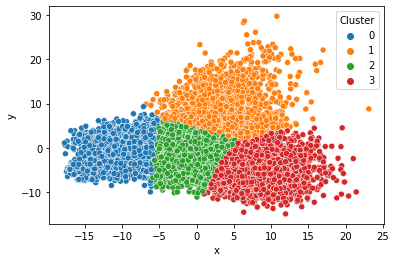

In [63]:
df = pd.DataFrame({'Cluster':kmeans.labels_,
                  'x':pca_2d_features[:,0],
                  'y': pca_2d_features[:,1]})
df['Cluster'] = df['Cluster'].astype('category')

sns.scatterplot(x="x", y='y', data=df, hue="Cluster")
plt.savefig('Clusters0302.png')

In [65]:
#plt.scatter(pca_2d_features[:,0],pca_2d_features[:,1], c=kmeans.labels_, cmap='rainbow')
#plt.legend()

In [29]:
#torch.save(model.state_dict(), "/Volumes/ksankaran/DeepGlobe/models/original_model.pt")

In [90]:
model = Unet(3, 7,2).to(args["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])

In [91]:
alpha = [1,1,1,1]
beta = [1,1,1,1]

In [92]:
T =20
Y = []
I = []
N = np.zeros((T,4))

In [93]:
pred_loss = []

In [94]:
start_time = time.time()
for t in range(T):
    pi = []
    for i in range(4):
        pi.append(np.random.beta(alpha[i],beta[i]))
    # Find out I_t at iter t (with the largest pi)
    indices = np.where(pi == np.array(pi).max())
    indices = np.asarray(indices) 
    maxidx = choice(indices[0,:])
    I.append(maxidx)
    
    # Randomly select an image to train on, in the selected cluster
    cluster_idx = np.where(kmeans.labels_ == maxidx)
    cluster_idx = choice(cluster_idx[0])
    print('cluster_idx = ', cluster_idx)
    
    
    # Train the selected pre-trained model on the newly selected source data
    further_train(model,cluster_idx,optimizer,loader = train_loader)
    # Train this further-pretrained model on the target data and obtain the accuracy
    val_loss = validate(model, validation_loader)
    print('validation loss is',val_loss)
    pred_loss.append(val_loss)
    if t == 0:
        alpha[I[t]] = alpha[I[t]]
    elif pred_loss[t] < pred_loss[t-1]:
        Y.append(1)
        alpha[I[t]] = alpha[I[t]]+1
    else:
        Y.append(0)
        beta[I[t]] = beta[I[t]] + 1
    print('t=',t,', alpha=',alpha[I[t]],', beta = ',beta[I[t]])
    print("--- %seconds ---" % (time.time() - start_time))

cluster_idx =  8824
loaded x y
got y hat


/Users/miaoxinran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/Users/miaoxinran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


validation loss is tensor(0.0324, dtype=torch.float64)
t= 0 , alpha= 1 , beta =  1
--- 1758.9533309936523econds ---
cluster_idx =  5719
loaded x y
got y hat
validation loss is tensor(0.0323, dtype=torch.float64)
t= 1 , alpha= 2 , beta =  1
--- 3496.2570838928223econds ---
cluster_idx =  4938
loaded x y
got y hat
validation loss is tensor(0.0323, dtype=torch.float64)
t= 2 , alpha= 2 , beta =  1
--- 5199.098248004913econds ---
cluster_idx =  2682
loaded x y
got y hat
validation loss is tensor(0.0322, dtype=torch.float64)
t= 3 , alpha= 2 , beta =  1
--- 6899.040933847427econds ---
cluster_idx =  1471
loaded x y
got y hat
validation loss is tensor(0.0322, dtype=torch.float64)
t= 4 , alpha= 3 , beta =  1
--- 8603.14491891861econds ---
cluster_idx =  1635
loaded x y
got y hat
validation loss is tensor(0.0322, dtype=torch.float64)
t= 5 , alpha= 4 , beta =  1
--- 10316.258347034454econds ---
cluster_idx =  3664
loaded x y
got y hat
validation loss is tensor(0.0321, dtype=torch.float64)
t= 6 , 

In [121]:
#torch.save(model.state_dict(), "/Users/miaoxinran/Documents/DeepGlobe/0302/selection20_model.pt")

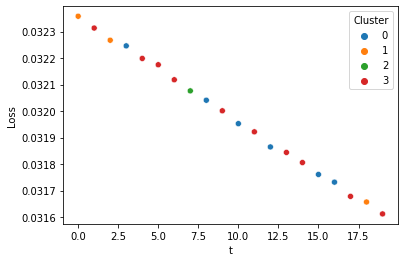

In [151]:
df = pd.DataFrame({'Loss':pred_loss,
                  'Cluster':I,
                  't': np.arange(0,20,1).tolist()})
df['Cluster'] = df['Cluster'].astype('category')

sns.scatterplot(x="t", y='Loss', data=df, hue="Cluster").invert_yaxis()
plt.savefig('loss.png')

In [122]:
test_loss = validate(model, test_loader)

/Users/miaoxinran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


In [123]:
test_loss

tensor(0.0316, dtype=torch.float64)

In [143]:
val_loss = validate(model, validation_loader)
val_loss

/Users/miaoxinran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


tensor(0.0316, dtype=torch.float64)

Train the model with random selection

In [124]:
model_random = Unet(3, 7,2).to(args["device"])
optimizer = torch.optim.Adam(model_random.parameters(), lr=args["lr"])

In [125]:
ID_random = []
pred_loss_random = []

In [126]:
start_time = time.time()
for t in range(T):
    ID_random.append(choice(range(len(kmeans.labels_))))
    
    # Train the selected pre-trained model on the newly selected source data
    further_train(model_random,ID_random[t],optimizer,loader = train_loader)
    # Train this further-pretrained model on the target data and obtain the accuracy
    #val_loss = validate(model_random, validation_loader)
    #print('validation loss is',val_loss)
    pred_loss_random.append(val_loss)
    print('t=',t,"--- %seconds ---" % (time.time() - start_time))

loaded x y
got y hat
t= 0 --- 1.5186021327972412econds ---


/Users/miaoxinran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


loaded x y
got y hat
t= 1 --- 2.930204153060913econds ---
loaded x y
got y hat
t= 2 --- 4.330987930297852econds ---
loaded x y
got y hat
t= 3 --- 5.732413053512573econds ---
loaded x y
got y hat
t= 4 --- 7.132192134857178econds ---
loaded x y
got y hat
t= 5 --- 8.523742198944092econds ---
loaded x y
got y hat
t= 6 --- 9.926810026168823econds ---
loaded x y
got y hat
t= 7 --- 11.350397109985352econds ---
loaded x y
got y hat
t= 8 --- 12.76452922821045econds ---
loaded x y
got y hat
t= 9 --- 14.18319821357727econds ---
loaded x y
got y hat
t= 10 --- 15.60223913192749econds ---
loaded x y
got y hat
t= 11 --- 16.996598958969116econds ---
loaded x y
got y hat
t= 12 --- 18.39396905899048econds ---
loaded x y
got y hat
t= 13 --- 19.79141330718994econds ---
loaded x y
got y hat
t= 14 --- 21.225232124328613econds ---
loaded x y
got y hat
t= 15 --- 22.625171184539795econds ---
loaded x y
got y hat
t= 16 --- 24.03272795677185econds ---
loaded x y
got y hat
t= 17 --- 25.433166027069092econds ---
l

In [136]:
test_loss_random = validate(model_random, test_loader)
test_loss_random

/Users/miaoxinran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


tensor(0.0314, dtype=torch.float64)